In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.api as sm
%matplotlib inline

In [2]:
sns.set_theme(style="darkgrid")

# 1. Reading and Understanding the Data

In [3]:
# Read the data
data = pd.read_csv("train.csv")
data.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# Show all columns in the dataset
pd.set_option('max_columns', 500)
data.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
# Show all rows in the dataset
pd.options.display.max_rows = 500

In [6]:
# Get the number of rows and columns and also check the type of the data
print(data.shape, end = "\n\n")
data.info()

(1460, 81)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 

#### 1.1. Make the 'Id' column an index column

In [7]:
# Check whether the instant can be used an index by looking at unique values in the column
data["Id"].nunique()

1460

In [8]:
# Drop 'Id' column as there is an index provided by dataframe
del data['Id']

In [9]:
# Get the number of rows and columns and also check the first few rows of the data
print(data.shape, end = "\n\n")
data.head(5)

(1460, 80)



MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

In [10]:
data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

# 2. Univariate Analysis

#### 2.1. Convert the Year fields into Bin categories

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64


<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

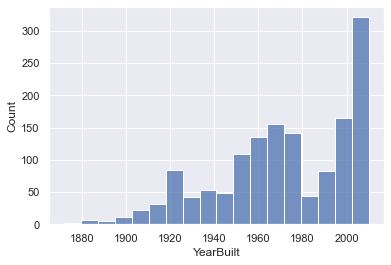

In [11]:
# Check the 'YearBuilt' field and draw a histogram
print(data["YearBuilt"].describe())
sns.histplot(data=data, x="YearBuilt")

(2000, 2010]    364
(1960, 1980]    356
(1940, 1960]    245
(1980, 2000]    238
(1920, 1940]    139
(1900, 1920]     93
(1870, 1900]     25
Name: YearBuilt, dtype: int64


[Text(0, 0, '(2000, 2010]'),
 Text(1, 0, '(1960, 1980]'),
 Text(2, 0, '(1900, 1920]'),
 Text(3, 0, '(1980, 2000]'),
 Text(4, 0, '(1920, 1940]'),
 Text(5, 0, '(1940, 1960]'),
 Text(6, 0, '(1870, 1900]')]

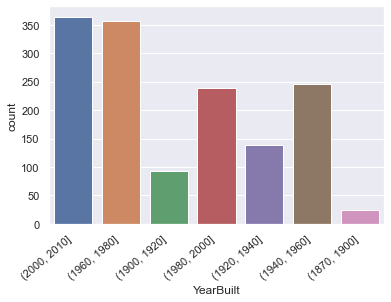

In [12]:
# Convert the 'YearBuilt' into different bin categories
data["YearBuilt"] = pd.cut(data["YearBuilt"], bins=[1870,1900, 1920, 1940, 1960, 1980, 2000, 2010]).astype(str) 

# Check the 'YearBuilt' field and draw a histogram
print(data["YearBuilt"].value_counts())
ax = sns.countplot(x="YearBuilt", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


<AxesSubplot:xlabel='YearRemodAdd', ylabel='Count'>

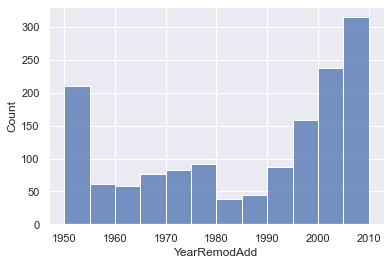

In [13]:
# Check the 'YearRemodAdd' field and draw a histogram
print(data["YearRemodAdd"].describe())
sns.histplot(data=data, x="YearRemodAdd")

(2000, 2010]    497
(1990, 2000]    285
(1940, 1950]    178
(1970, 1980]    159
(1960, 1970]    149
(1950, 1960]    106
(1980, 1990]     86
Name: YearRemodAdd, dtype: int64


[Text(0, 0, '(2000, 2010]'),
 Text(1, 0, '(1970, 1980]'),
 Text(2, 0, '(1960, 1970]'),
 Text(3, 0, '(1990, 2000]'),
 Text(4, 0, '(1940, 1950]'),
 Text(5, 0, '(1950, 1960]'),
 Text(6, 0, '(1980, 1990]')]

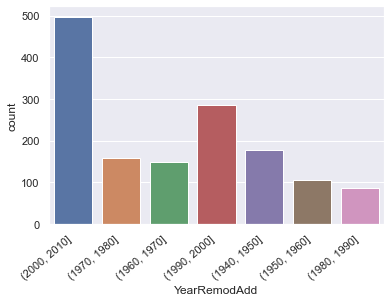

In [14]:
# Convert the 'YearRemodAdd' into different bin categories
data["YearRemodAdd"] = pd.cut(data["YearRemodAdd"], bins=[1940,1950, 1960, 1970, 1980, 1990, 2000, 2010]).astype(str) 

# Check the 'YearRemodAdd' field and draw a histogram
print(data["YearRemodAdd"].value_counts())
ax = sns.countplot(x="YearRemodAdd", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


<AxesSubplot:xlabel='GarageYrBlt', ylabel='Count'>

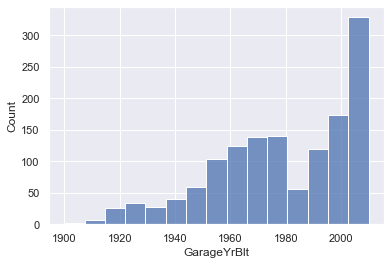

In [15]:
# Check the 'GarageYrBlt' field and draw a histogram
print(data["GarageYrBlt"].describe())
sns.histplot(data=data, x="GarageYrBlt")

(2000.0, 2010.0]    375
(1960.0, 1980.0]    367
(1980.0, 2000.0]    303
(1940.0, 1960.0]    211
(1920.0, 1940.0]     92
nan                  82
(1900.0, 1920.0]     30
Name: GarageYrBlt, dtype: int64


[Text(0, 0, '(2000.0, 2010.0]'),
 Text(1, 0, '(1960.0, 1980.0]'),
 Text(2, 0, '(1980.0, 2000.0]'),
 Text(3, 0, '(1920.0, 1940.0]'),
 Text(4, 0, '(1940.0, 1960.0]'),
 Text(5, 0, '(1900.0, 1920.0]'),
 Text(6, 0, 'nan')]

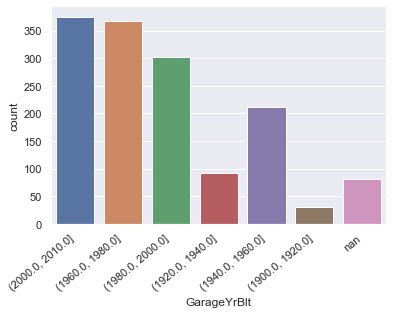

In [16]:
# Convert the 'GarageYrBlt' into different bin categories
data["GarageYrBlt"] = pd.cut(data["GarageYrBlt"], bins=[1900, 1920, 1940, 1960, 1980, 2000, 2010]).astype(str) 

# Check the 'GarageYrBlt' field and draw a histogram
print(data["GarageYrBlt"].value_counts())
ax = sns.countplot(x="GarageYrBlt", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

(2000.0, 2010.0]    375
(1960.0, 1980.0]    367
(1980.0, 2000.0]    303
(1940.0, 1960.0]    211
(1920.0, 1940.0]     92
No_year              82
(1900.0, 1920.0]     30
Name: GarageYrBlt, dtype: int64


[Text(0, 0, '(2000.0, 2010.0]'),
 Text(1, 0, '(1960.0, 1980.0]'),
 Text(2, 0, '(1980.0, 2000.0]'),
 Text(3, 0, '(1920.0, 1940.0]'),
 Text(4, 0, '(1940.0, 1960.0]'),
 Text(5, 0, '(1900.0, 1920.0]'),
 Text(6, 0, 'No_year')]

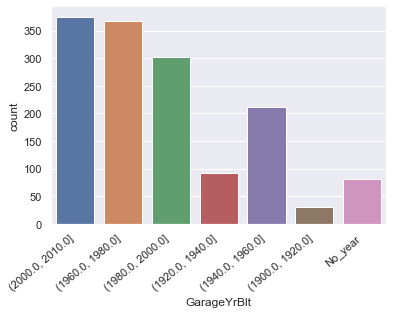

In [17]:
# Convert the 'GarageYrBlt' into different bin categories
data["GarageYrBlt"] = data["GarageYrBlt"].replace('nan', 'No_year', regex=True)

# Check the 'GarageYrBlt' field and draw a histogram
print(data["GarageYrBlt"].value_counts())
ax = sns.countplot(x="GarageYrBlt", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

#### 2.2. Action on the empty data in the columns

In [18]:
# Get the columns and the number of empty records 
data.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [19]:
# Get the columns with empty data
nan_columns = [col for col in data.columns if data[col].isnull().any()]
nan_columns
data[nan_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageFinish  1379 non-null   object 
 13  GarageQual    1379 non-null   object 
 14  GarageCond    1379 non-null   object 
 15  PoolQC        7 non-null      object 
 16  Fence         281 non-null    object 
 17  MiscFeature   54 non-null     object 
dtypes: float64(2), object(16)
me

In [20]:
# Get the unique counts of 'Alley' column
data["Alley"].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [21]:
# Replace the empty data in 'Alley' column with 'None'
data["Alley"].fillna("None", inplace=True)
data["Alley"].value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [22]:
# Replace the empty data in columns related to 'Basement'  with 'None'
data["BsmtQual"].fillna("None", inplace=True)
data["BsmtCond"].fillna("None", inplace=True)
data["BsmtExposure"].fillna("None", inplace=True)
data["BsmtFinType1"].fillna("None", inplace=True)
data["BsmtFinType2"].fillna("None", inplace=True)

# Replace the empty data in 'FireplaceQu', 'Fence', 'PoolQC' and 'MiscFeature' columns with 'None'
data["FireplaceQu"].fillna("None", inplace=True)
data["Fence"].fillna("None", inplace=True)
data["PoolQC"].fillna("None", inplace=True)
data["MiscFeature"].fillna("None", inplace=True)

# Replace the empty data in columns related to 'Garage'  with 'None'
data["GarageType"].fillna("None", inplace=True)
data["GarageFinish"].fillna("None", inplace=True)
data["GarageQual"].fillna("None", inplace=True)
data["GarageCond"].fillna("None", inplace=True)

In [23]:
# Get the columns with empty data
nan_columns = [i for i in data.columns if data[i].isnull().any()]
nan_columns
data[nan_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   MasVnrType   1452 non-null   object 
 2   MasVnrArea   1452 non-null   float64
 3   Electrical   1459 non-null   object 
dtypes: float64(2), object(2)
memory usage: 45.8+ KB


In [24]:
# Get the details of 'LotFrontage' column
print(data["LotFrontage"].describe())
data["LotFrontage"].value_counts()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
69.0      11
76.0      11
86.0      10
53.0      10
34.0      10
92.0      10
88.0      10
62.0       9
44.0       9
84.0       9
77.0       9
35.0       9
93.0       8
61.0       8
98.0       8
96.0       8
107.0      7
120.0      7
95.0       7
58.0       7
41.0       6
30.0       6
81.0       6
89.0       6
105.0      6
48.0       6
110.0      6
94.0       6
54.0       6
91.0       6
36.0       6
47.0       5
37.0       5
83.0       5
56.0       5
87.0       5
32.0       5
42.0       4
49.0       4
102.0      4
103.0      3
108.0      3
99.0       3
104.0      3
45.0       3
130.0      3
174.0      2

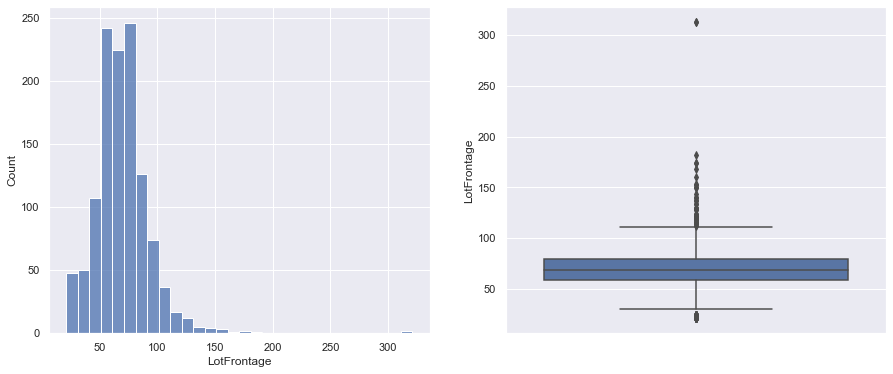

In [25]:
# Draw the graphs for 'LotFrontage' column
fig = plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(data=data, x="LotFrontage", binwidth=10)

plt.subplot(1,2,2)
sns.boxplot( y=data["LotFrontage"] );

In [26]:
# Replace the empty data in 'LotFrontage' column with median of 'LotFrontage'
data["LotFrontage"].fillna(data["LotFrontage"].median(), inplace=True)
data["LotFrontage"].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [27]:
# Get the details of 'MasVnrArea' column
print(data["MasVnrArea"].describe())
print(data["MasVnrArea"].value_counts())

# Get the rows where 'MasVnrArea' column is null
data[data['MasVnrArea'].isna()]

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
76.0        4
288.0       4
456.0       4
40.0        4
50.0        3
130.0       3
82.0        3
208.0       3
90.0        3
70.0        3
44.0        3
420.0       3
99.0        3
110.0       3
104.0       3
85.0        3
272.0       3
226.0       3
174.0       3
240.0       3
186.0       3
169.0       3
148.0       3
350.0       3
128.0       3
176.0       3
166.0       3
1

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
234           60       RL         69.0     7851   Pave  None      Reg   
529           20       RL         69.0    32668   Pave  None      IR1   
650           60       FV         65.0     8125   Pave  None      Reg   
936           20       RL         67.0    10083   Pave  None      Reg   
973           20       FV         95.0    11639   Pave  None      Reg   
977          120       FV         35.0     4274   Pave  Pave      IR1   
1243          20       RL        107.0    13891   Pave  None      Reg   
1278          60       RL         75.0     9473   Pave  None      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
234          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
529          Lvl    AllPub   CulDSac       Gtl      Crawfor       Norm   
650          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
936          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
973          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
977          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1243         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
1278         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond     YearBuilt  \
234        Norm     1Fam     2Story            6            5  (2000, 2010]   
529        Norm     1Fam     1Story            6            3  (1940, 1960]   
650        Norm     1Fam     2Story            7            6  (2000, 2010]   
936        Norm     1Fam     1Story            7            5  (2000, 2010]   
973        Norm     1Fam     1Story            7            5  (2000, 2010]   
977        Norm   TwnhsE     1Story            7            5  (2000, 2010]   
1243       Norm     1Fam     1Story           10            5  (2000, 2010]   
1278       Norm     1Fam     2Story            8            5  (2000, 2010]   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
234   (2000, 2010]     Gable  CompShg     VinylSd     VinylSd        NaN   
529   (1970, 1980]       Hip  CompShg     Wd Sdng       Stone        NaN   
650   (2000, 2010]     Gable  CompShg     CemntBd     CmentBd        NaN   
936   (2000, 2010]     Gable  CompShg     VinylSd     VinylSd        NaN   
973   (2000, 2010]     Gable  CompShg     CemntBd     CmentBd        NaN   
977   (2000, 2010]     Gable  CompShg     VinylSd     VinylSd        NaN   
1243  (2000, 2010]     Gable  CompShg     VinylSd     VinylSd        NaN   
1278  (2000, 2010]     Gable  CompShg     VinylSd     VinylSd        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
234          NaN        Gd        TA      PConc       Gd       TA   
529          NaN        Gd        TA      PConc       TA       TA   
650          NaN        Gd        TA      PConc       Gd       TA   
936          NaN        Gd        TA      PConc       Gd       TA   
973          NaN        Gd        TA      PConc       Gd       TA   
977          NaN        Gd        TA      PConc       Gd       TA   
1243         NaN        Ex        TA      PConc       Ex       Gd   
1278         NaN        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
234            No          GLQ         625          Unf           0   
529            No          Rec        1219          Unf           0   
650            No          Unf           0          Unf           0   
936            No          GLQ         833          Unf           0   
973            No          Unf           0          Unf           0   
977            No          GLQ        1106          Unf           0   
1243           Gd          GLQ        1386          Unf           0   
1278           No          GLQ         804          Unf           0   

      BsmtUnfSF  Total

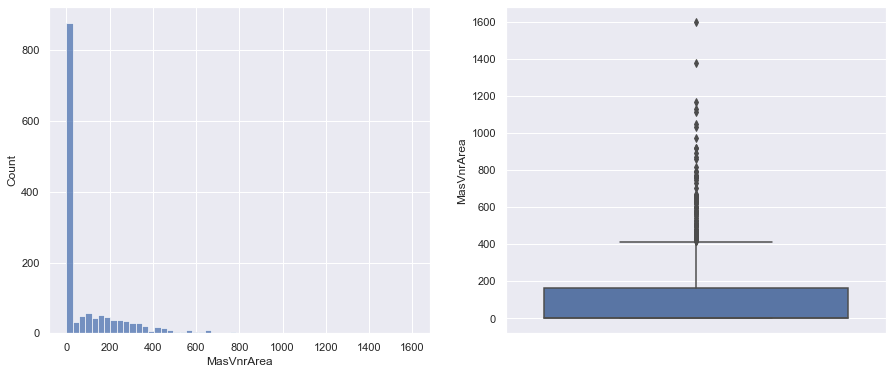

In [28]:
# Draw the graphs for 'MasVnrArea' column
fig = plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
sns.histplot(data=data, x="MasVnrArea")

plt.subplot(1,2,2)
sns.boxplot( y=data["MasVnrArea"] );

In [29]:
# Replace the empty data in 'MasVnrArea' column with median of 'LotFrontage'
data["MasVnrArea"].fillna(data["MasVnrArea"].median(), inplace=True)
data["MasVnrArea"].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [30]:
# Get more details about 'Electrical' column 
print(data['Electrical'].describe())
print(data['Electrical'].value_counts())

# Get the rows where 'Electrical' column is null
data[data['Electrical'].isna()]

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379          80       RL         73.0     9735   Pave  None      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1379         Lvl    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond     YearBuilt  \
1379       Norm     1Fam       SLvl            5            5  (2000, 2010]   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1379  (2000, 2010]     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379        384          384    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1379       754       640             0       1394             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1379         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
1379             7        Typ           0        None    BuiltIn   

           GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
1379  (2000.0, 2010.0]          Fin           2         400         TA   

     GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
1379         TA          Y         100            0              0          0   

      ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold  \
1379            0         0   None  None        None        0       5    2008   

     SaleType SaleCondition  SalePrice  
1379       WD        Normal     167500

In [31]:
# Replace the empty data in 'Electrical' column with mode of 'Electrical'
data["Electrical"].fillna(data["Electrical"].mode()[0], inplace=True)

# Get more details about 'Electrical' column 
print(data['Electrical'].describe())
print(data['Electrical'].value_counts())

# Get the rows where 'Electrical' column is null
data[data['Electrical'].isna()]

count      1460
unique        5
top       SBrkr
freq       1335
Name: Electrical, dtype: object
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [32]:
# Get more details about 'MasVnrType' column 
print(data['MasVnrType'].describe())
print(data['MasVnrType'].value_counts())

# Get the rows where 'MasVnrType' column is null
data[data['MasVnrType'].isna()]

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
234           60       RL         69.0     7851   Pave  None      Reg   
529           20       RL         69.0    32668   Pave  None      IR1   
650           60       FV         65.0     8125   Pave  None      Reg   
936           20       RL         67.0    10083   Pave  None      Reg   
973           20       FV         95.0    11639   Pave  None      Reg   
977          120       FV         35.0     4274   Pave  Pave      IR1   
1243          20       RL        107.0    13891   Pave  None      Reg   
1278          60       RL         75.0     9473   Pave  None      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
234          Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
529          Lvl    AllPub   CulDSac       Gtl      Crawfor       Norm   
650          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
936          Lvl    AllPub    Inside       Gtl      SawyerW       Norm   
973          Lvl    AllPub    Corner       Gtl      Somerst       Norm   
977          Lvl    AllPub    Inside       Gtl      Somerst       Norm   
1243         Lvl    AllPub    Inside       Gtl      NridgHt       Norm   
1278         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond     YearBuilt  \
234        Norm     1Fam     2Story            6            5  (2000, 2010]   
529        Norm     1Fam     1Story            6            3  (1940, 1960]   
650        Norm     1Fam     2Story            7            6  (2000, 2010]   
936        Norm     1Fam     1Story            7            5  (2000, 2010]   
973        Norm     1Fam     1Story            7            5  (2000, 2010]   
977        Norm   TwnhsE     1Story            7            5  (2000, 2010]   
1243       Norm     1Fam     1Story           10            5  (2000, 2010]   
1278       Norm     1Fam     2Story            8            5  (2000, 2010]   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
234   (2000, 2010]     Gable  CompShg     VinylSd     VinylSd        NaN   
529   (1970, 1980]       Hip  CompShg     Wd Sdng       Stone        NaN   
650   (2000, 2010]     Gable  CompShg     CemntBd     CmentBd        NaN   
936   (2000, 2010]     Gable  CompShg     VinylSd     VinylSd        NaN   
973   (2000, 2010]     Gable  CompShg     CemntBd     CmentBd        NaN   
977   (2000, 2010]     Gable  CompShg     VinylSd     VinylSd        NaN   
1243  (2000, 2010]     Gable  CompShg     VinylSd     VinylSd        NaN   
1278  (2000, 2010]     Gable  CompShg     VinylSd     VinylSd        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
234          0.0        Gd        TA      PConc       Gd       TA   
529          0.0        Gd        TA      PConc       TA       TA   
650          0.0        Gd        TA      PConc       Gd       TA   
936          0.0        Gd        TA      PConc       Gd       TA   
973          0.0        Gd        TA      PConc       Gd       TA   
977          0.0        Gd        TA      PConc       Gd       TA   
1243         0.0        Ex        TA      PConc       Ex       Gd   
1278         0.0        Gd        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
234            No          GLQ         625          Unf           0   
529            No          Rec        1219          Unf           0   
650            No          Unf           0          Unf           0   
936            No          GLQ         833          Unf           0   
973            No          Unf           0          Unf           0   
977            No          GLQ        1106          Unf           0   
1243           Gd          GLQ        1386          Unf           0   
1278           No          GLQ         804          Unf           0   

      BsmtUnfSF  Total

In [33]:
# Replace the empty data in 'MasVnrType' column with mode of 'MasVnrType'
data["MasVnrType"].fillna(data["MasVnrType"].mode()[0], inplace=True)

# Get more details about 'MasVnrType' column 
print(data['MasVnrType'].describe())
print(data['MasVnrType'].value_counts())

# Get the rows where 'MasVnrType' column is null
data[data['MasVnrType'].isna()]

count     1460
unique       4
top       None
freq       872
Name: MasVnrType, dtype: object
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [34]:
# Get the number of rows and columns and also check the type of the data
print(data.shape, end = "\n\n")
data.info()

(1460, 80)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 

#### 2.3. Convert categorical columns from 'int' type to 'str' type

In [35]:
str_columns = ['OverallQual', 'OverallCond','YrSold']
data[str_columns] = data[str_columns].astype(str)

In [36]:
#Get details on 'MoSold' column
data["MoSold"].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [37]:
# Convert the values in 'MoSold' column to its original month names
import calendar
data['MoSold'] = data['MoSold'].apply(lambda x : calendar.month_abbr[int(x)].lower())  # Get the abbrevated form of month from numbers
data["MoSold"].value_counts()

jun    253
jul    234
may    204
apr    141
aug    122
mar    106
oct     89
nov     79
sep     63
dec     59
jan     58
feb     52
Name: MoSold, dtype: int64

In [38]:
# Get the number of rows and columns and also check the type of the data
print(data.shape, end = "\n\n")
data.info()

(1460, 80)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 

#### 2.4. Check the graphs of different variables

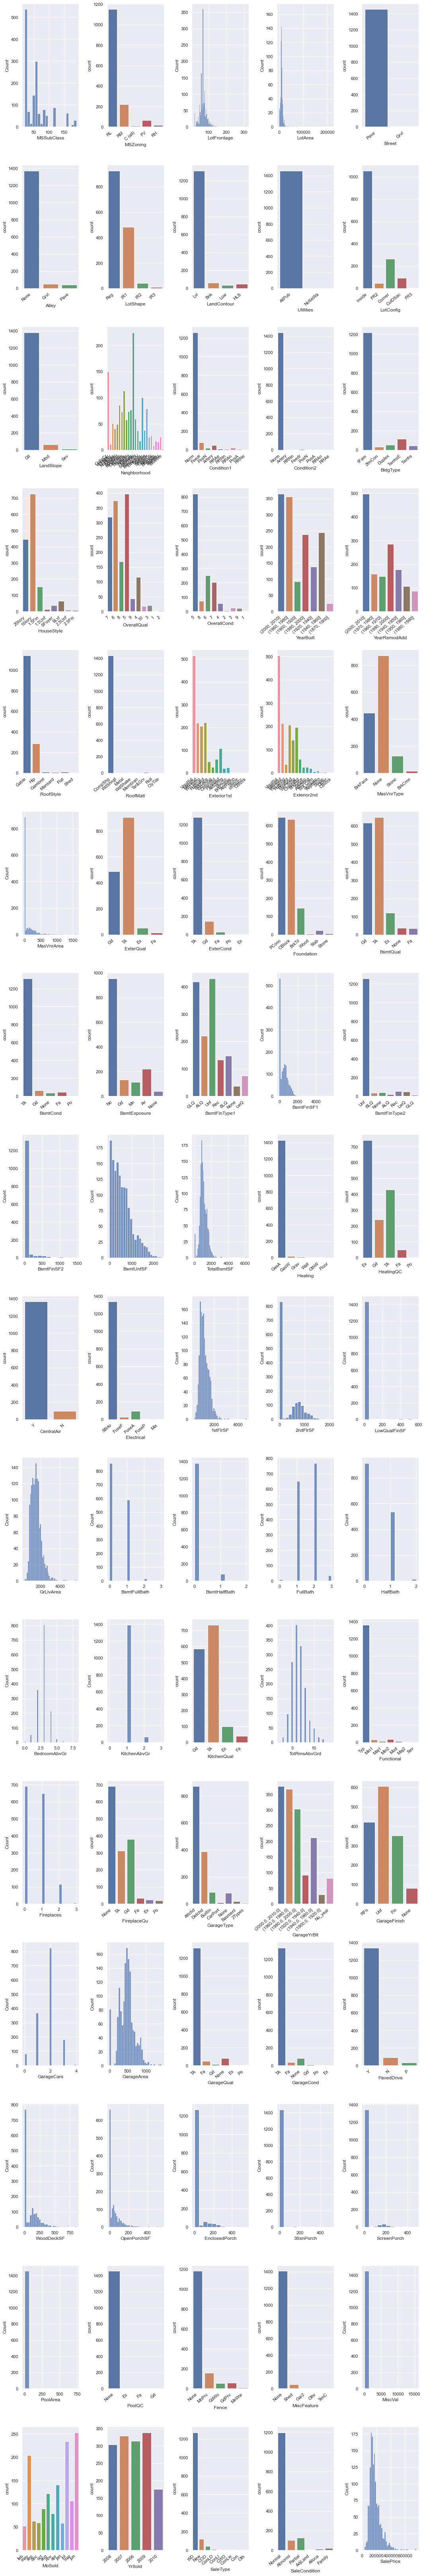

In [39]:
# Draw the graphs for all features

plt.figure(figsize=(15,90))
for i, col in enumerate(data.columns, 1):
    plt.subplot(16,5,i) 
    if data[col].dtype=='object' :
        plot = sns.countplot(x=col, data=data)                            # count plot for categorical variables
        plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right") 
    else :
        plot = sns.histplot(data=data, x=col)                             # histogram for numerical variable
    plt.tight_layout()

# 3. Bivariate Analysis

#### 3.1. Read correlation between variables

<AxesSubplot:>

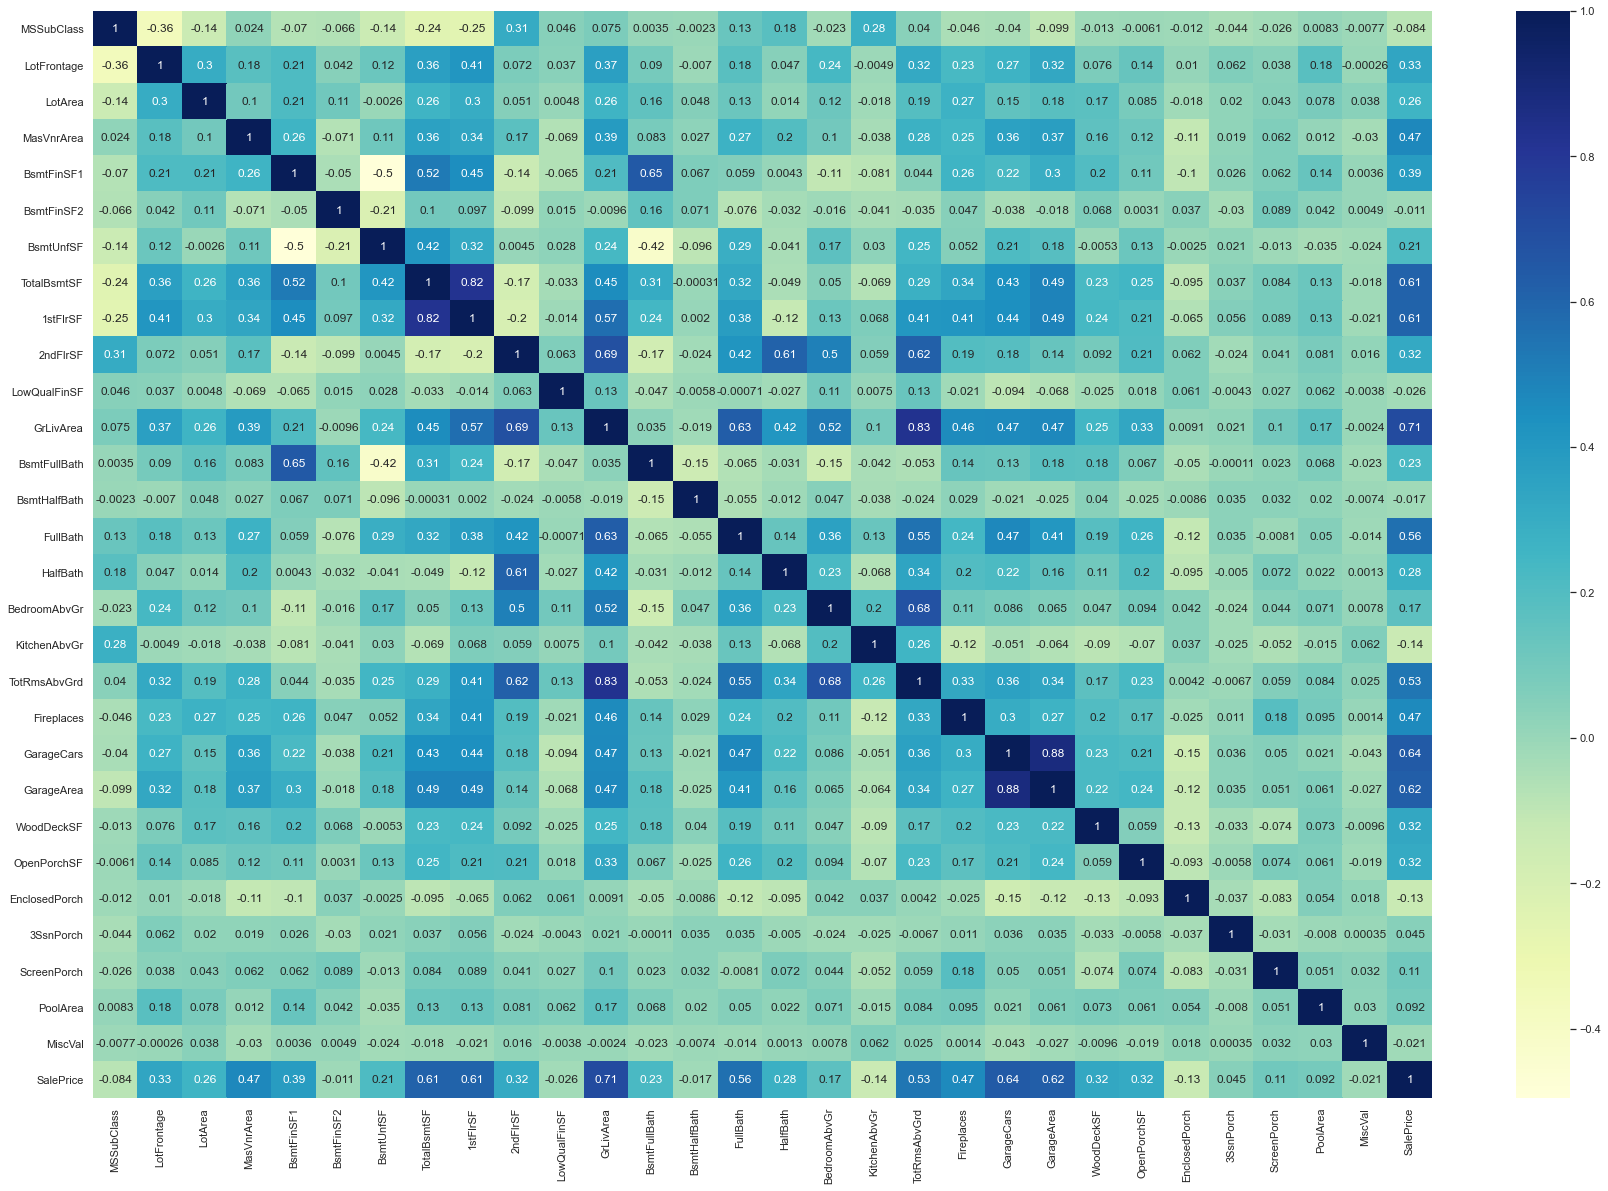

In [40]:
plt.figure(figsize=(30, 20))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

#### 3.2. Check the relationship of 'Sales Price' with remaining variables

In [41]:
# Create a list of columns of type 'str' 
obj_columns = [col for col in data.columns if data[col].dtype=='object']
obj_columns
data[obj_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  OverallQual    1460 non-null   object
 14  OverallCond    1460 non-null   object
 15  YearBuilt      1460 non-null   object
 16  YearRemodAdd   1460 non-null   object
 17  RoofStyle      1460 non-null   object
 18  RoofMatl       1460 non-null

In [42]:
# Create a list of columns of type 'int'  and 'float'
nonobj_columns = [col for col in data.columns if data[col].dtype!='object']
nonobj_columns
data[nonobj_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   MasVnrArea     1460 non-null   float64
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinSF2     1460 non-null   int64  
 6   BsmtUnfSF      1460 non-null   int64  
 7   TotalBsmtSF    1460 non-null   int64  
 8   1stFlrSF       1460 non-null   int64  
 9   2ndFlrSF       1460 non-null   int64  
 10  LowQualFinSF   1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  BsmtFullBath   1460 non-null   int64  
 13  BsmtHalfBath   1460 non-null   int64  
 14  FullBath       1460 non-null   int64  
 15  HalfBath       1460 non-null   int64  
 16  BedroomAbvGr   1460 non-null   int64  
 17  KitchenAbvGr   1460 non-null   int64  
 18  TotRmsAb

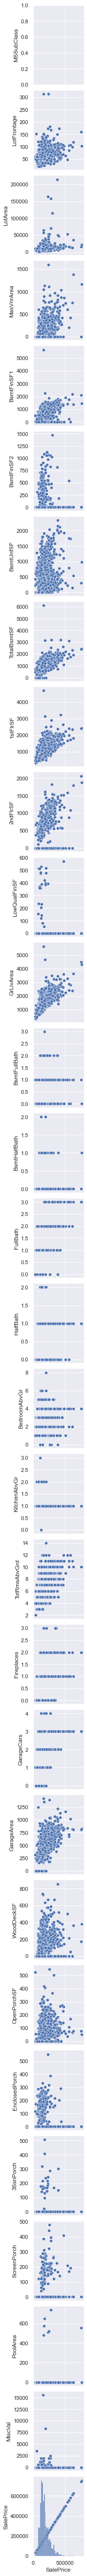

In [43]:
# Draw a pair plot between 'SalePrice' and the remaining numerical variables
sns.pairplot(data=data, x_vars=['SalePrice'], y_vars=nonobj_columns)

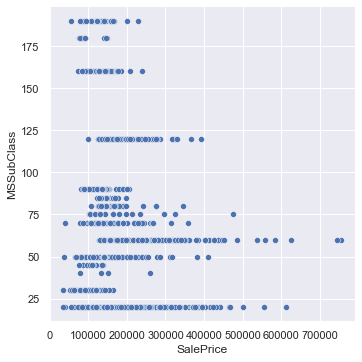

In [44]:
# Check the relationship between 'SalePrice' and 'MSSubClass'
sns.relplot(y="MSSubClass", x="SalePrice", data=data)

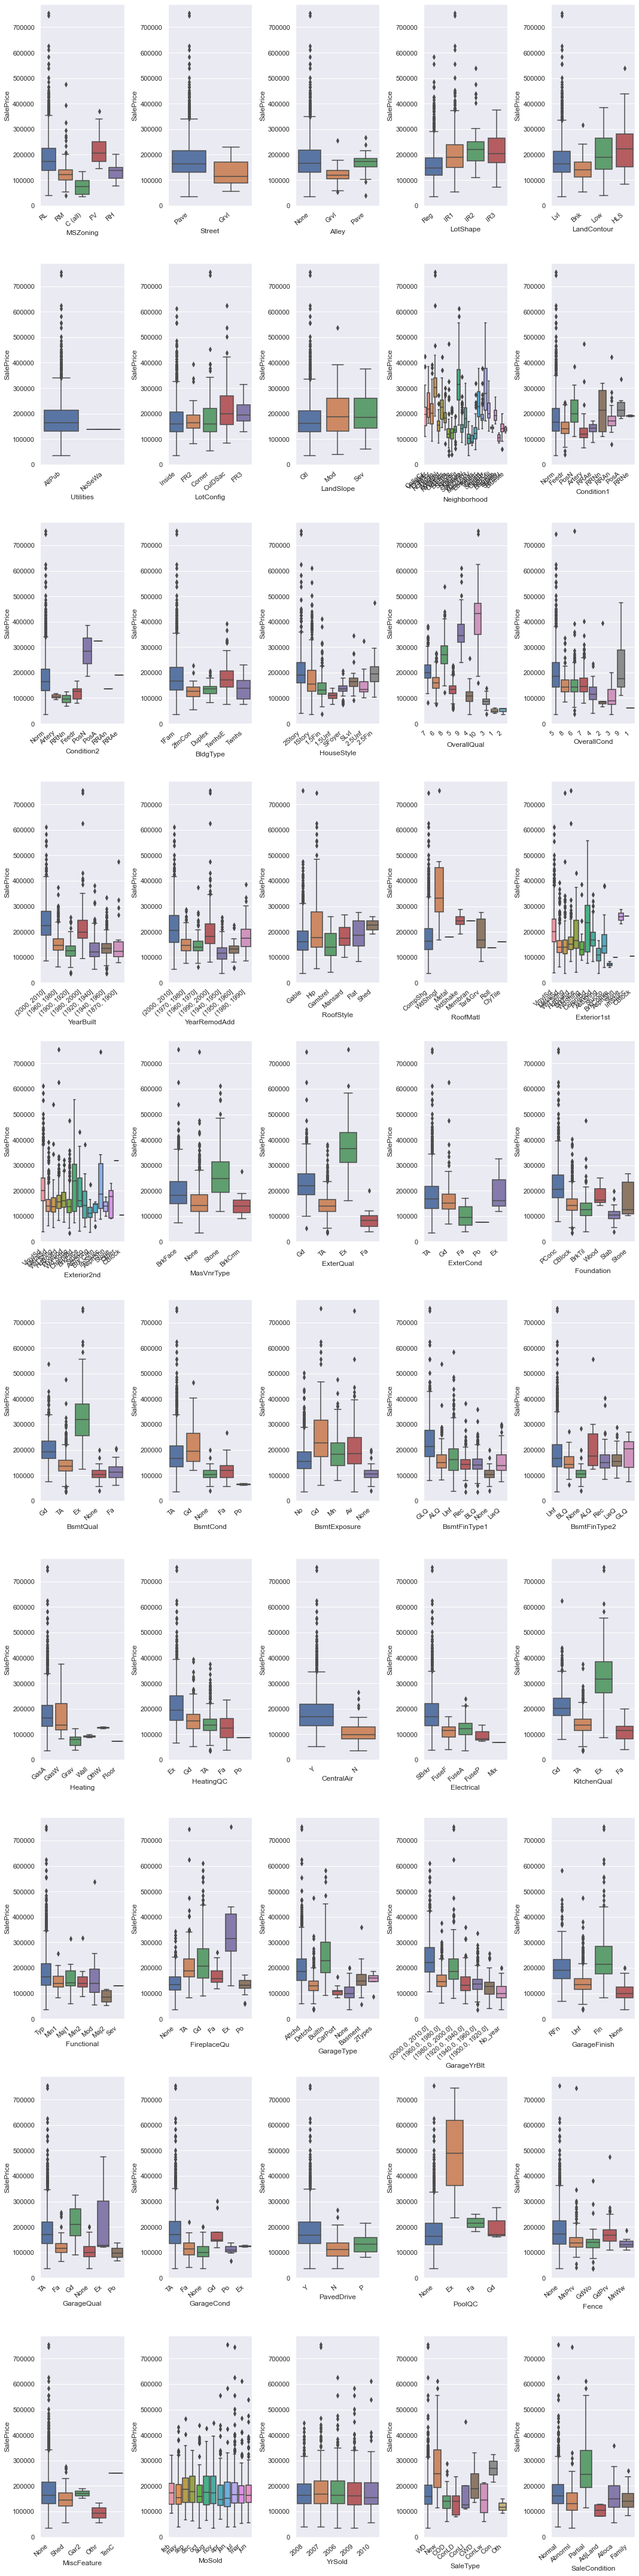

In [45]:
# Draw a pair plot between 'SalePrice' and the remaining categorical variables
plt.figure(figsize=(15,60))

for i, col in enumerate(obj_columns, 1):
    plt.subplot(10,5,i) 
    plot = sns.boxplot(x=col, y="SalePrice",data=data)
    #g.set(yscale="log")
    plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right") 
    plt.tight_layout()

# 4. Dummy Value creation

#### 4.1. Replace the least occuring values with 'Others' in categorical columns

In [46]:
# Show the unique value percentages for each categorical column
for col in obj_columns :
    print(col, ":", "\n")
    print(data[col].value_counts(normalize=True))

MSZoning : 

RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street : 

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
Alley : 

None    0.937671
Grvl    0.034247
Pave    0.028082
Name: Alley, dtype: float64
LotShape : 

Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour : 

Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities : 

AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig : 

Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope : 

Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
Neighborhood : 

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0

In [47]:
# Below columns have data distributed in even terms and hence not replacing the least frequent values with 'Others'
restricted_cols = ["Neighborhood", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "Exterior1st", "Exterior2nd", "BsmtFinType1", "GarageYrBlt"]

# Replace the third frequent value to least frequent value in every categorical column with 'others'
for col in obj_columns :
   if col not in restricted_cols :
        values = data[col].value_counts()
        values = values.index[2:]
        data[col] = data[col].apply(lambda x:"others" if x in values else x)

In [48]:
# Show the unique value percentages for each categorical column
for col in obj_columns :
        print(col, ":", "\n")
        print(data[col].value_counts(normalize=True))

MSZoning : 

RL        0.788356
RM        0.149315
others    0.062329
Name: MSZoning, dtype: float64
Street : 

Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
Alley : 

None      0.937671
Grvl      0.034247
others    0.028082
Name: Alley, dtype: float64
LotShape : 

Reg       0.633562
IR1       0.331507
others    0.034932
Name: LotShape, dtype: float64
LandContour : 

Lvl       0.897945
others    0.058904
Bnk       0.043151
Name: LandContour, dtype: float64
Utilities : 

AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig : 

Inside    0.720548
Corner    0.180137
others    0.099315
Name: LotConfig, dtype: float64
LandSlope : 

Gtl       0.946575
Mod       0.044521
others    0.008904
Name: LandSlope, dtype: float64
Neighborhood : 

NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.0397

#### 4.2. Create dummies for String variables

In [49]:
# Prefix the column name before every value in the columns of type 'str'
for col in obj_columns :
    data[col] = data[col].apply(lambda x: f"{col}_{x}")

In [50]:
# Check the data for Alley in dataframe
data['Alley'].value_counts()

Alley_None      1369
Alley_Grvl        50
Alley_others      41
Name: Alley, dtype: int64

In [51]:
# Iterate through each column and create dummies

for col in obj_columns :
    status = pd.get_dummies(data[col], drop_first = True) # Create the dummy variables for Alley column
    data = pd.concat([data, status], axis=1)              # Concat the status with main dataframe
    data.drop([col], axis = 1, inplace = True)            # Drop the original column as we have dummies created for it

data.sample(5)

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
160           20         69.0    11120         0.0         660           0   
1357          20         69.0    12537         0.0         734           0   
1111          60         80.0    10480       660.0         403           0   
35            60        108.0    13418       132.0           0           0   
1397          70         51.0     6120         0.0           0           0   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
160         572         1232      1232         0             0       1232   
1357        344         1078      1078         0             0       1078   
1111        400          803      1098       866             0       1964   
35         1117         1117      1132      1320             0       2452   
1397        939          939       939       574             0       1513   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
160              0             0         2         0             3   
1357             1             0         1         1             3   
1111             0             0         2         1             4   
35               0             0         3         1             4   
1397             0             0         1         1             4   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
160              1             6           0           2         516   
1357             1             6           1           2         500   
1111             1             8           1           2         483   
35               1             9           1           3         691   
1397             1             8           0           1         180   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
160            0            0              0          0            0   
1357           0            0              0          0            0   
1111           0           69              0          0            0   
35           113           32              0          0            0   
1397          24            0            150          0            0   

      PoolArea  MiscVal  SalePrice  MSZoning_RM  MSZoning_others  Street_Pave  \
160          0        0     162500            0                0            1   
1357         0        0     149900            0                0            1   
1111         0        0     205000            0                0            1   
35           0        0     309000            0                0            1   
1397         0        0     137500            1                0            1   

      Alley_None  Alley_others  LotShape_Reg  LotShape_others  \
160            1             0             0                0   
1357           1             0             0                0   
1111           1             0             1                0   
35             1             0             1                0   
1397           1             0             1                0   

      LandContour_Lvl  LandContour_others  Utilities_NoSeWa  LotConfig_Inside  \
160                 1                   0                 0                 0   
1357                1                   0                 0                 0   
1111                1                   0                 0                 1   
35                  1                   0                 0                 1   
1397                1                   0                 0                 1   

      LotConfig_others  LandSlope_Mod  LandSlope_others  Neighborhood_Blueste  \
160                  1              0                 0                     0   
1357                 1              0                 0                     0   
1111                 0              0                 0                     0   
35                   0              0                 0                     0   
1397             

In [52]:
# Get the number of rows and columns and also check the type of the data
print(data.shape, end = "\n\n")
data.info()

(1460, 203)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 203 entries, MSSubClass to SaleCondition_others
dtypes: float64(2), int64(28), uint8(173)
memory usage: 589.0 KB


In [53]:
data.describe()

MSSubClass  LotFrontage        LotArea   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    69.863699   10516.828082   103.117123   443.639726   
std      42.300571    22.027677    9981.264932   180.731373   456.098091   
min      20.000000    21.000000    1300.000000     0.000000     0.000000   
25%      20.000000    60.000000    7553.500000     0.000000     0.000000   
50%      50.000000    69.000000    9478.500000     0.000000   383.500000   
75%      70.000000    79.000000   11601.500000   164.250000   712.250000   
max     190.000000   313.000000  215245.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000       0.000000   
max       4.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal      SalePrice  \
count  1460.000000  1460.000000  1460.000000   1460.000000    1460.000000   
mean      3.409589    15.060959     2.758904     43.489041  180921.195890   
std      29.317331    55.757415    40.177307    496.123024   79442.502883   
min       0.000000     0.000000     0.000000      0.000000   34900.000000   
25%       0.000000     0.000000     0.000000      0.000000  129975.000000   
50%       0.000000     0.000000     0.000000      0.000000  163000.000000   
75%       0.000000     0.000000     0.000000

In [54]:
data[data["SalePrice"]> 500000]

MSSubClass  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
178           20         63.0    17423       748.0        1904           0   
440           20        105.0    15431       200.0        1767         539   
691           60        104.0    21535      1170.0        1455           0   
769           60         47.0    53504       603.0        1416           0   
803           60        107.0    13891       424.0           0           0   
898           20        100.0    12919       760.0        2188           0   
1046          60         85.0    16056       208.0         240           0   
1169          60        118.0    35760      1378.0        1387           0   
1182          60        160.0    15623         0.0        2096           0   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
178         312         2216      2234         0             0       2234   
440         788         3094      2402         0             0       2402   
691         989         2444      2444      1872             0       4316   
769         234         1650      1690      1589             0       3279   
803        1734         1734      1734      1088             0       2822   
898         142         2330      2364         0             0       2364   
1046       1752         1992      1992       876             0       2868   
1169        543         1930      1831      1796             0       3627   
1182        300         2396      2411      2065             0       4476   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
178              1             0         2         0             1   
440              1             0         2         0             2   
691              0             1         3         1             4   
769              1             0         3         1             4   
803              0             0         3         1             4   
898              1             0         2         1             2   
1046             0             0         3         1             4   
1169             1             0         3         1             4   
1182             1             0         3         1             4   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  \
178              1             9           1           3        1166   
440              1            10           2           3         672   
691              1            10           2           3         832   
769              1            12           1           3         841   
803              1            12           1           3        1020   
898              1            11           2           3         820   
1046             1            11           1           3         716   
1169             1            10           1           3         807   
1182             1            10           2           3         813   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
178            0           60              0          0            0   
440            0           72              0          0          170   
691          382           50              0          0            0   
769          503           36              0          0          210   
803           52          170              0          0          192   
898            0           67              0          0            0   
1046         214          108              0          0            0   
1169         361           76              0          0            0   
1182         171           78              0          0            0   

      PoolArea  MiscVal  SalePrice  MSZoning_RM  MSZoning_others  Street_Pave  \
178          0        0     501837            0                0            1   
440          0        0     555000            0                0            1   
691          0        0     755000            0                0    

In [55]:
# Change the sales price to log data as there are very large values
data['SalePrice'] = np.log(data['SalePrice'])

# 5. Splitting the Data into Training and Testing Sets

#### 5.1 Split the data into training and test sets

In [56]:
from sklearn.model_selection import train_test_split

# set the seed to zero so that same rows are placed in test and training sets everytime, the notebook is executed.
np.random.seed(0) 

# Split the data with 30% as test size
df_train,df_test = train_test_split(data, test_size=.3, random_state=101)

In [57]:
print("Training data shape", df_train.shape, sep=" : ")
print("Test data shape", df_test.shape, sep=" : ")
data.shape

Training data shape : (1022, 203)
Test data shape : (438, 203)


(1460, 203)

#### 5.2 Scale the training data using MinMaxScaler

In [58]:
# scale the numerical columns in the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [59]:
df_train.describe()

MSSubClass  LotFrontage        LotArea   MasVnrArea   BsmtFinSF1  \
count  1022.000000  1022.000000    1022.000000  1022.000000  1022.000000   
mean     55.758317    70.148728   10314.303327   105.485323   449.261252   
std      41.860354    21.837423    7347.707888   184.220425   441.370232   
min      20.000000    21.000000    1533.000000     0.000000     0.000000   
25%      20.000000    60.000000    7579.000000     0.000000     0.000000   
50%      50.000000    69.000000    9548.500000     0.000000   382.000000   
75%      70.000000    79.000000   11700.000000   165.500000   723.000000   
max     190.000000   313.000000  164660.000000  1600.000000  2260.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   
mean     51.110568   568.736791  1069.108611  1165.537182   338.987280   
std     169.870592   444.028112   420.734539   375.758782   435.855412   
min       0.000000     0.000000     0.000000   372.000000     0.000000   
25%       0.000000   234.250000   808.500000   892.000000     0.000000   
50%       0.000000   471.500000  1008.000000  1096.500000     0.000000   
75%       0.000000   811.000000  1309.750000  1381.000000   716.750000   
max    1474.000000  2153.000000  3206.000000  3228.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1022.000000  1022.000000   1022.000000   1022.000000  1022.000000   
mean       5.617417  1510.141879      0.427593      0.062622     1.569472   
std       48.177535   515.324796      0.520060      0.246408     0.555065   
min        0.000000   438.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1454.000000      0.000000      0.000000     2.000000   
75%        0.000000  1782.750000      1.000000      0.000000     2.000000   
max      528.000000  4676.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1022.000000   1022.000000   1022.000000   1022.000000  1022.000000   
mean      0.380626      2.864971      1.041096      6.502935     0.623288   
std       0.501649      0.816916      0.208239      1.615756     0.642874   
min       0.000000      0.000000      0.000000      3.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1022.000000  1022.000000  1022.000000  1022.000000    1022.000000   
mean      1.765166   472.750489    96.111546    44.647750      22.334638   
std       0.746943   212.698688   124.318378    61.820941      62.850035   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   331.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   171.000000    68.000000       0.000000   
max       4.000000  1390.000000   857.000000   502.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal    SalePrice  \
count  1022.000000  1022.000000  1022.000000   1022.000000  1022.000000   
mean      3.268102    15.107632     2.749511     53.414873    12.028959   
std      29.681538    54.030863    39.381654    585.329446     0.394739   
min       0.000000     0.000000     0.000000      0.000000    10.542706   
25%       0.000000     0.000000     0.000000      0.000000    11.771436   
50%       0.000000     0.000000     0.000000      0.000000    12.009144   
75%       0.000000     0.000000     0.000000      0.000000

In [60]:
# Apply scaler() to all the columns except the 'dummy' variables

pd.options.mode.chained_assignment = None  # to mitigate SettingWithCopyWarning

df_train[nonobj_columns] = scaler.fit_transform(df_train[nonobj_columns])

In [61]:
df_train.describe()

MSSubClass  LotFrontage      LotArea   MasVnrArea   BsmtFinSF1  \
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   
mean      0.210343     0.168318     0.053831     0.065928     0.198788   
std       0.246237     0.074786     0.045043     0.115138     0.195297   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.133562     0.037063     0.000000     0.000000   
50%       0.176471     0.164384     0.049137     0.000000     0.169027   
75%       0.294118     0.198630     0.062326     0.103438     0.319912   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   
mean      0.034675     0.264160     0.333471     0.277849     0.164158   
std       0.115245     0.206237     0.131233     0.131568     0.211068   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.108802     0.252183     0.182073     0.000000   
50%       0.000000     0.218997     0.314410     0.253676     0.000000   
75%       0.000000     0.376684     0.408531     0.353291     0.347094   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1022.000000  1022.000000   1022.000000   1022.000000  1022.000000   
mean       0.010639     0.252983      0.142531      0.031311     0.523157   
std        0.091245     0.121596      0.173353      0.123204     0.185022   
min        0.000000     0.000000      0.000000      0.000000     0.000000   
25%        0.000000     0.162341      0.000000      0.000000     0.333333   
50%        0.000000     0.239736      0.000000      0.000000     0.666667   
75%        0.000000     0.317308      0.333333      0.000000     0.666667   
max        1.000000     1.000000      1.000000      1.000000     1.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1022.000000   1022.000000   1022.000000   1022.000000  1022.000000   
mean      0.190313      0.358121      0.347032      0.318449     0.207763   
std       0.250824      0.102114      0.069413      0.146887     0.214291   
min       0.000000      0.000000      0.000000      0.000000     0.000000   
25%       0.000000      0.250000      0.333333      0.181818     0.000000   
50%       0.000000      0.375000      0.333333      0.272727     0.333333   
75%       0.500000      0.375000      0.333333      0.363636     0.333333   
max       1.000000      1.000000      1.000000      1.000000     1.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1022.000000  1022.000000  1022.000000  1022.000000    1022.000000   
mean      0.441292     0.340108     0.112149     0.088940       0.040461   
std       0.186736     0.153021     0.145062     0.123149       0.113859   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.250000     0.238489     0.000000     0.000000       0.000000   
50%       0.500000     0.345324     0.000000     0.047809       0.000000   
75%       0.500000     0.414388     0.199533     0.135458       0.000000   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

         3SsnPorch  ScreenPorch     PoolArea      MiscVal    SalePrice  \
count  1022.000000  1022.000000  1022.000000  1022.000000  1022.000000   
mean      0.006433     0.034336     0.004243     0.003446     0.499005   
std       0.058428     0.122797     0.060774     0.037763     0.132533   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.412542   
50%       0.000000     0.000000     0.000000     0.000000     0.492352   
75%       0.000000     0.000000     0.000000     0.000000     0.582752   
max      

#### 5.3 Dividing into X and Y sets for the model building

In [62]:
y_train = df_train.pop("SalePrice")
X_train = df_train
X_train_additional = df_train

In [63]:
print(X_train.columns, end = "\n\n")

X_train.info()

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'MiscFeature_Shed', 'MiscFeature_others', 'MoSold_jun', 'MoSold_others',
       'YrSold_2009', 'YrSold_others', 'SaleType_WD', 'SaleType_others',
       'SaleCondition_Partial', 'SaleCondition_others'],
      dtype='object', length=202)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 1312 to 863
Columns: 202 entries, MSSubClass to SaleCondition_others
dtypes: float64(29), uint8(173)
memory usage: 412.2 KB


# 6. Build the model

#### 6.1 Build the initial model using OLS method

In [64]:
# Add constant
X_train_lm = sm.add_constant(X_train)

# Build linear model using OLS
lm = sm.OLS(y_train, X_train_lm).fit()

# Get the summary of linear model regression
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     60.44
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:24:24   Log-Likelihood:                 2011.6
No. Observations:                1022   AIC:                            -3629.
Df Residuals:                     825   BIC:                            -2658.
Df Model:                         196                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1733      0.251      0.689      0.491      -0.320       0.667
MSSubClass                      -0.0159      0.018     -0.878      0.380      -0.051       0.020
LotFrontage                      0.0240      0.024      1.010      0.313      -0.023       0.071
LotArea                          0.1051      0.043      2.466      0.014       0.021       0.189
MasVnrArea                       0.0049      0.018      0.271      0.786      -0.031       0.040
BsmtFinSF1                       0.0458      0.013      3.580      0.000       0.021       0.071
BsmtFinSF2                       0.0554      0.019      2.930      0.003       0.018       0.092
BsmtUnfSF                        0.0089      0.011      0.782      0.434      -0.013       0.031
TotalBsmtSF                      0.0638      0.016      3.962      0.000       0.032       0.095
1stFlrSF                         0.1073      0.022      4.784      0.000       0.063       0.151
2ndFlrSF                         0.0863      0.017      5.068      0.000       0.053       0.120
LowQualFinSF                     0.0129      0.017      0.766      0.444      -0.020       0.046
GrLivArea                        0.1132      0.016      7.062      0.000       0.082       0.145
BsmtFullBath                     0.0292      0.012      2.416      0.016       0.005       0.053
BsmtHalfBath                     0.0026      0.012      0.208      0.836      -0.022       0.027
FullBath                         0.0211      0.013      1.595      0.111      -0.005       0.047
HalfBath                         0.0086      0.008      1.032      0.302      -0.008       0.025
BedroomAbvGr                     0.0115      0.021      0.537      0.591      -0.030       0.053
KitchenAbvGr                    -0.0415      0.031     -1.328      0.185      -0.103       0.020
TotRmsAbvGrd                     0.0513      0.021      2.457      0.014       0.010       0.092
Fireplaces                       0.0159      0.015      1.043      0.297      -0.014       0.046
GarageCars                       0.0454      0.018      2.480      0.013       0.009       0.081
GarageArea                       0.0459      0.022      2.080      0.038       0.003       0.089
WoodDeckSF                       0.0263      0.010      2.542      0.011       0.006       0.047
OpenPorchSF                      0.0206      0.012      1.656      0.098      -0.004       0.045
EnclosedPorch                    0.0294      0.013      2.178      0.030       0.003       0.056
3SsnPorch                        0.0323      0.022      1.463      0.144      -0.011       0.076
ScreenPorch                      0.0353      0.011      3.101      0.002       0.013       0.058
PoolArea                         0.1446      0.261      0.553      0.580    

#### 6.2 Perform RFE and select top 100 features

In [65]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=150)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [66]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 7),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', False, 31),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', True, 1),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('MSZoning_RM', True, 1),
 ('MSZoning_others', True, 1),
 ('Street_Pave', True, 1),
 ('Alley_None', True, 1),
 ('Alley_others', True, 1),
 ('LotShape_Reg', False, 38),
 ('LotShape_others', True, 1),
 ('LandContour_Lvl', True, 1),
 ('LandConto

In [67]:
# Get the columns selected by RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'PoolQC_others', 'Fence_others', 'MiscFeature_Shed',
       'MiscFeature_others', 'MoSold_others', 'YrSold_others', 'SaleType_WD',
       'SaleType_others', 'SaleCondition_Partial', 'SaleCondition_others'],
      dtype='object', length=150)

In [68]:
# Show the columns unselected by RFE
nonrfe_col = X_train.columns[~rfe.support_]
nonrfe_col

Index(['MasVnrArea', 'HalfBath', 'LotShape_Reg', 'LandContour_others',
       'LotConfig_others', 'Neighborhood_BrDale', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_OldTown',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'BldgType_TwnhsE',
       'BldgType_others', 'HouseStyle_2Story', 'YearBuilt_(1900, 1920]',
       'YearRemodAdd_(1950, 1960]', 'RoofStyle_Hip', 'RoofMatl_Tar&Grv',
       'Exterior1st_CemntBd', 'Exterior1st_Wd Sdng', 'Exterior2nd_AsphShn',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
       'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng',
       'MasVnrType_others', 'ExterQual_TA', 'ExterQual_others',
       'Foundation_others', 'BsmtCond_TA', 'BsmtExposure_No',
       'BsmtFinType1_BLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_None',
       'BsmtFinType1_Rec', 'BsmtFinType2_others', 'Electrical_others',
       'KitchenQual_TA', 'FireplaceQu_None', 'FireplaceQu_others',


In [69]:
X_train_rfe = X_train[rfe_col] 

# Add constant
X_train_lm = sm.add_constant(X_train_rfe)

# Build linear model using OLS
lm = sm.OLS(y_train, X_train_lm).fit()

# Get the summary of linear model regression
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     85.72
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:24:25   Log-Likelihood:                 2002.1
No. Observations:                1022   AIC:                            -3714.
Df Residuals:                     877   BIC:                            -2999.
Df Model:                         144                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1426      0.237      0.603      0.547      -0.322       0.607
MSSubClass                      -0.0199      0.008     -2.501      0.013      -0.035      -0.004
LotFrontage                      0.0312      0.021      1.491      0.136      -0.010       0.072
LotArea                          0.1131      0.039      2.886      0.004       0.036       0.190
BsmtFinSF1                       0.0428      0.011      3.764      0.000       0.020       0.065
BsmtFinSF2                       0.0445      0.016      2.852      0.004       0.014       0.075
BsmtUnfSF                        0.0040      0.010      0.403      0.687      -0.016       0.024
TotalBsmtSF                      0.0534      0.013      4.251      0.000       0.029       0.078
1stFlrSF                         0.1207      0.019      6.290      0.000       0.083       0.158
2ndFlrSF                         0.0857      0.010      8.452      0.000       0.066       0.106
LowQualFinSF                     0.0117      0.016      0.736      0.462      -0.020       0.043
GrLivArea                        0.1223      0.014      8.648      0.000       0.095       0.150
BsmtFullBath                     0.0305      0.011      2.713      0.007       0.008       0.053
BsmtHalfBath                     0.0041      0.011      0.359      0.720      -0.018       0.027
FullBath                         0.0219      0.011      1.927      0.054      -0.000       0.044
BedroomAbvGr                     0.0069      0.020      0.346      0.730      -0.032       0.046
KitchenAbvGr                    -0.0426      0.024     -1.751      0.080      -0.090       0.005
TotRmsAbvGrd                     0.0475      0.019      2.448      0.015       0.009       0.085
Fireplaces                       0.0286      0.008      3.749      0.000       0.014       0.044
GarageCars                       0.0439      0.017      2.536      0.011       0.010       0.078
GarageArea                       0.0477      0.020      2.396      0.017       0.009       0.087
WoodDeckSF                       0.0290      0.010      3.001      0.003       0.010       0.048
OpenPorchSF                      0.0248      0.012      2.142      0.032       0.002       0.047
EnclosedPorch                    0.0308      0.013      2.417      0.016       0.006       0.056
3SsnPorch                        0.0286      0.021      1.362      0.173      -0.013       0.070
ScreenPorch                      0.0385      0.011      3.600      0.000       0.018       0.059
PoolArea                         0.1935      0.247      0.782      0.434      -0.292       0.679
MiscVal                          0.0829      0.049      1.707      0.088      -0.012       0.178
MSZoning_RM                     -0.0222      0.005     -4.334      0.000    

In [70]:
# Access P-values
lm.pvalues

const                           5.467538e-01
MSSubClass                      1.255954e-02
LotFrontage                     1.362980e-01
LotArea                         3.999973e-03
BsmtFinSF1                      1.786924e-04
BsmtFinSF2                      4.441223e-03
BsmtUnfSF                       6.869265e-01
TotalBsmtSF                     2.360226e-05
1stFlrSF                        4.997231e-10
2ndFlrSF                        1.185713e-16
LowQualFinSF                    4.620803e-01
GrLivArea                       2.478585e-17
BsmtFullBath                    6.806856e-03
BsmtHalfBath                    7.196415e-01
FullBath                        5.428404e-02
BedroomAbvGr                    7.295203e-01
KitchenAbvGr                    8.026464e-02
TotRmsAbvGrd                    1.455247e-02
Fireplaces                      1.889538e-04
GarageCars                      1.139125e-02
GarageArea                      1.676897e-02
WoodDeckSF                      2.764823e-03
OpenPorchS

In [71]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Features          VIF
86                  OverallCond_4          inf
83                  OverallQual_9          inf
85                  OverallCond_3          inf
82                  OverallQual_8          inf
87                  OverallCond_5          inf
76                  OverallQual_2          inf
75                 OverallQual_10          inf
77                  OverallQual_3          inf
125            Exterior2nd_CBlock          inf
78                  OverallQual_4          inf
182                 GarageQual_TA          inf
88                  OverallCond_6          inf
89                  OverallCond_7          inf
90                  OverallCond_8          inf
91                  OverallCond_9          inf
183             GarageQual_others          inf
184                 GarageCond_TA          inf
185             GarageCond_others          inf
111            Exterior1st_CBlock          inf
81                  OverallQual_7          inf
7                     TotalBsmtSF          inf
6                       BsmtUnfSF          inf
5                      BsmtFinSF2          inf
4                      BsmtFinSF1          inf
80                  OverallQual_6          inf
79                  OverallQual_5          inf
84                  OverallCond_2          inf
11                      GrLivArea  14825857.55
8                        1stFlrSF   8077582.49
9                        2ndFlrSF   3192189.09
10                   LowQualFinSF     24568.68
188                   PoolQC_None       194.36
27                       PoolArea       182.11
119           Exterior1st_VinylSd        91.97
179           GarageYrBlt_No_year        87.90
134           Exterior2nd_VinylSd        84.91
115           Exterior1st_MetalSd        66.74
97         YearBuilt_(2000, 2010]        66.46
129           Exterior2nd_MetalSd        60.24
113           Exterior1st_HdBoard        53.49
198                   SaleType_WD        52.37
127           Exterior2nd_HdBoard        45.91
120           Exterior1st_Wd Sdng        44.61
112           Exterior1st_CemntBd        44.26
126           Exterior2nd_CmentBd        42.35
178  GarageYrBlt_(2000.0, 2010.0]        40.78
135           Exterior2nd_Wd Sdng        38.10
95         YearBuilt_(1960, 1980]        35.68
200         SaleCondition_Partial        33.67
96         YearBuilt_(1980, 2000]        31.85
131           Exterior2nd_Plywood        29.83
116           Exterior1st_Plywood        25.24
176  GarageYrBlt_(1960.0, 1980.0]        25.15
94         YearBuilt_(1940, 1960]        24.06
54             Neighborhood_NAmes        23.65
177  GarageYrBlt_(1980.0, 2000.0]        22.97
199               SaleType_others        22.32
59           Neighborhood_OldTown        18.29
175  GarageYrBlt_(1940.0, 1960.0]        16.75
47           Neighborhood_CollgCr        15.10
0                      MSSubClass        14.29
93         YearBuilt_(1920, 1940]        12.35
49           Neighborhood_Edwards        12.25
110           Exterior1st_BrkFace        12.02
73              HouseStyle_2Story        12.00
63           Neighborhood_Somerst        11.53
136           Exterior2nd_Wd Shng        11.01
61            Neighborhood_Sawyer        10.22
45           Neighborhood_BrkSide         9.95
50           Neighborhood_Gilbert         9.42
56            Neighborhood_NWAmes         9.38
121           Exterior1st_WdShing         8.79
58           Neighborhood_NridgHt         8.73
103     YearRemodAdd_(2000, 2010]         8.71
72                BldgType_others         8.57
20                     GarageCars         8.43
170              FireplaceQu_None         8.36
21                     GarageArea         8.22
174  GarageYrBlt_(1920.0, 1940.0]         7.86
19                     Fireplaces         7.73
118            Exterior1st_Stucco         7.64
92         YearBuilt_(1900, 1920]         7.51
71                BldgType_TwnhsE         7.43
157              BsmtFinType2_Unf         7.34
133            Exterior2nd_Stu

In [72]:
# Get p-values and vif in single dataframe

vif.set_index("Features", inplace=True)            # make features as an index in vif dataframe
vif = pd.concat([vif, lm.pvalues], axis = 1)     # add p-values to vif dataframe
vif.columns = ['VIF', 'p-value']                   # add column names to vif dataframe
vif = vif.sort_values(by = "p-value", ascending = False)
vif

VIF       p-value
Exterior1st_CBlock                    inf  9.993853e-01
Exterior2nd_CBlock                    inf  9.993853e-01
OverallCond_3                         inf  9.064463e-01
Exterior2nd_Stone                    2.23  7.991980e-01
Condition2_Norm                      7.20  7.925851e-01
Exterior1st_ImStucc                  1.62  7.792966e-01
BedroomAbvGr                         3.43  7.295203e-01
BsmtHalfBath                         1.66  7.196415e-01
BsmtUnfSF                             inf  6.869265e-01
Exterior1st_Stone                     NaN  6.189118e-01
Exterior2nd_ImStucc                  3.86  6.166570e-01
PoolQC_None                        194.36  6.073019e-01
const                                 NaN  5.467538e-01
OverallCond_2                         inf  5.266101e-01
Neighborhood_SWISU                   4.76  4.892716e-01
SaleCondition_Partial               33.67  4.758405e-01
LowQualFinSF                     24568.68  4.620803e-01
Exterior1st_AsphShn                  2.20  4.365571e-01
PoolArea                           182.11  4.343356e-01
Neighborhood_NPkVill                 3.26  4.230463e-01
GarageYrBlt_(1960.0, 1980.0]        25.15  4.216004e-01
Exterior2nd_Stucco                   7.33  4.102416e-01
Neighborhood_Blueste                 1.43  4.008955e-01
PoolQC_others                        6.24  3.886768e-01
Heating_GasW                         2.02  3.877054e-01
OverallQual_2                         inf  3.838214e-01
YearBuilt_(1920, 1940]              12.35  3.741959e-01
Exterior2nd_BrkFace                  6.78  3.599734e-01
BsmtQual_others                      2.65  3.571928e-01
Exterior2nd_MetalSd                 60.24  3.535058e-01
Alley_None                           3.36  3.524560e-01
Exterior2nd_Other                    1.52  3.489903e-01
BsmtQual_TA                          4.38  3.422575e-01
Exterior1st_HdBoard                 53.49  3.348312e-01
Exterior1st_WdShing                  8.79  3.307290e-01
OverallQual_4                         inf  3.190310e-01
Alley_others                         3.17  3.065126e-01
Functional_Typ                       4.56  2.529197e-01
YearRemodAdd_(2000, 2010]            8.71  2.394592e-01
BsmtFinType1_Unf                     4.93  2.390519e-01
Exterior1st_BrkComm                  3.94  2.345442e-01
Neighborhood_NWAmes                  9.38  2.229040e-01
SaleType_others                     22.32  2.195009e-01
BsmtFinType1_GLQ                     3.82  2.132930e-01
Neighborhood_ClearCr                 5.26  2.076880e-01
SaleType_WD                         52.37  1.995208e-01
Exterior1st_Plywood                 25.24  1.830859e-01
Exterior1st_MetalSd                 66.74  1.813548e-01
3SsnPorch                            1.20  1.734516e-01
OverallQual_3                         inf  1.645376e-01
Street_Pave                          1.76  1.627077e-01
BsmtFinType2_Unf                     7.34  1.589994e-01
PavedDrive_Y                         2.83  1.563276e-01
Neighborhood_MeadowV                 4.31  1.487775e-01
GarageYrBlt_(2000.0, 2010.0]        40.78  1.411049e-01
MoSold_others                        2.19  1.409694e-01
Utilities_NoSeWa                     1.38  1.364317e-01
LotFrontage                          2.27  1.362980e-01
MiscFeature_others                   2.98  1.350137e-01
OverallCond_4                         inf  1.291257e-01
Condition1_Norm                      3.18  1.249622e-01
Neighborhood_CollgCr                15.10  1.207653e-01
LandSlope_Mod                        1.75  1.126155e-01
LandContour_Lvl                      3.68  1.115502e-01
LandSlope_others                     2.42  1.084022e-01
Neighborhood_Timber                  4.96  1.050989e-01
MSZoning_others                      3.58  1.003321e-01
CentralAir_Y                         2.59  9.665014e-02
MiscFeature_Shed                     1.46  9.591806e-02
RoofStyle_others                     2.73  9.517763e-02
YearRemodAdd_(1970, 1980]            5.61  9.300482e-02
MiscVa

In [73]:
# Function to show vif and p-values in a single dataframe
def get_vif_and_pvalue(df, is_pvalue_sort=True, is_print=True) :
    # Add constant
    df = sm.add_constant(df)
    
    # Build linear model using OLS
    model = sm.OLS(y_train, df).fit()
    
    print("R-squared", model.rsquared, sep = " : ")
    print("Adjusted R-squared", model.rsquared_adj, end = "\n\n", sep = " : ")
    
    # Create a dataframe for p-values
    result = model.pvalues.to_frame()
    result = pd.concat([result, model.params], axis = 1)     # add regression coefficient to dataframe
    result.drop(result.index[[0]], inplace=True)            # remove values of constant from dataframe
    
    # Add column names to result dataframe
    result.columns = ['p-value', 'coeff']  
    
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    result['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    
    # Round the values to 2-3 decimals in the dataframe
    result['p-value'] = round(result['p-value'], 3)
    result['VIF'] = round(result['VIF'], 2)
    result['coeff'] = round(result['coeff'], 3)
    
    # Sort the dataframe
    if(is_pvalue_sort) : 
        result = result.sort_values(by = "VIF", ascending = False)
        if(is_print) : 
            print(result)
        result = result.sort_values(by = "p-value", ascending = False)
    else : 
        result = result.sort_values(by = "VIF", ascending = False)
        
    return result

In [74]:
# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.9348916062869165
Adjusted R-squared : 0.9194234303259899



/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                              p-value  coeff          VIF
OverallCond_4                   0.139  0.039          inf
OverallQual_9                   0.000  0.128          inf
OverallCond_3                   0.748  0.009          inf
OverallQual_8                   0.000  0.088          inf
OverallCond_5                   0.036  0.054          inf
OverallQual_2                   0.457 -0.028          inf
OverallQual_10                  0.000  0.126          inf
OverallQual_3                   0.256 -0.030          inf
Exterior2nd_CBlock              0.957 -0.001          inf
OverallQual_4                   0.278  0.025          inf
GarageQual_TA                   0.005 -0.070          inf
OverallCond_6                   0.010  0.067          inf
OverallCond_7                   0.002  0.079          inf
OverallCond_8                   0.001  0.090          inf
OverallCond_9                   0.000  0.116          inf
GarageQual_others               0.008 -0.066          inf
GarageCond_TA 

p-value  coeff          VIF
Exterior2nd_Brk Cmn             0.996  0.000         5.47
Exterior2nd_VinylSd             0.992  0.000        84.91
Exterior2nd_HdBoard             0.986  0.000        45.91
ExterQual_others                0.983  0.000         2.64
Exterior1st_Wd Sdng             0.977 -0.001        44.61
GarageFinish_others             0.973  0.000         2.32
BldgType_TwnhsE                 0.967 -0.001         7.43
YearBuilt_(1900, 1920]          0.961  0.001         7.51
Exterior2nd_Plywood             0.958  0.001        29.83
Exterior2nd_CBlock              0.957 -0.001          inf
Exterior1st_CBlock              0.957 -0.001          inf
BsmtFinType2_others             0.955 -0.000         4.84
Neighborhood_BrDale             0.948  0.001         3.85
BldgType_others                 0.941 -0.001         8.57
Exterior2nd_Stone               0.921 -0.003         2.23
Exterior2nd_Wd Sdng             0.917  0.002        38.10
Exterior1st_HdBoard             0.894  0.003        53.49
Exterior2nd_AsphShn             0.890  0.005         3.21
MasVnrType_others               0.883  0.001         1.84
LotConfig_others                0.864  0.001         2.05
RoofMatl_Tar&Grv                0.864 -0.004         2.30
ExterQual_TA                    0.856 -0.001         4.27
Exterior1st_ImStucc             0.855 -0.009         1.62
Neighborhood_Mitchel            0.838  0.003         6.26
BsmtHalfBath                    0.836  0.003         1.66
Fence_None                      0.831  0.001         2.36
Condition2_Norm                 0.817  0.008         7.20
Neighborhood_NAmes              0.811  0.004        23.65
Exterior1st_CemntBd             0.809 -0.009        44.26
Exterior2nd_CmentBd             0.799  0.010        42.35
Exterior1st_Plywood             0.788  0.006        25.24
Neighborhood_IDOTRR             0.786  0.006         6.05
MasVnrArea                      0.786  0.005         3.13
Neighborhood_Sawyer             0.780  0.005        10.22
LotShape_Reg                    0.775 -0.001         1.66
MoSold_jun                      0.765  0.001         2.08
LandContour_others              0.764  0.003         3.56
Electrical_others               0.757  0.004         2.10
Exterior1st_Stone               0.754 -0.000          NaN
OverallCond_3                   0.748  0.009          inf
Neighborhood_OldTown            0.742  0.006        18.29
Exterior2nd_ImStucc             0.742  0.009         3.86
PoolQC_None                     0.739  0.078       194.36
Exterior2nd_Stucco              0.731 -0.009         7.33
KitchenQual_TA                  0.731 -0.001         3.26
YearBuilt_(1920, 1940]          0.728  0.005        12.35
Exterior2nd_MetalSd             0.716 -0.010        60.24
GarageYrBlt_(1980.0, 2000.0]    0.710 -0.005        22.97
Exterior1st_VinylSd             0.706  0.009        91.97
Foundation_others               0.704 -0.003         3.21
BsmtFinType1_None               0.692  0.008         5.79
BsmtQual_TA                     0.677 -0.002         4.38
HouseStyle_2Story               0.673 -0.004        12.00
Exterior1st_WdShing             0.665  0.010         8.79
BsmtCond_TA                     0.664 -0.003         2.58
PavedDrive_others               0.647  0.005         1.91
BsmtFinType1_Rec                0.623 -0.003         2.07
FireplaceQu_others              0.619  0.002         2.60
Exterior2nd_BrkFace             0.596 -0.014         6.78
BsmtFinType1_BLQ                0.592 -0.003         1.97
BedroomAbvGr                    0.591  0.011         3.43
FireplaceQu_None                0.589 -0.004         8.36
Neighborhood_Edwards            0.582 -0.009        12.25
PoolArea                        0.580  0.145       182.11
GarageYrBlt_(1940.0, 1960.0]    0.569 -0.008        16.75
GarageYrBlt_(2000.0, 2010.0]    0.566  0.010        40.78
Exterior1st_MetalSd             0.566  0.016        66.74
Neighborhood_NPkVill            0.566  0.016         3.26
OverallCond_2               

In [75]:
#Remove Exterior1st_Stone as VIF is NaN and p-value is large
X_train = X_train.drop(["Exterior1st_Stone"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.9348916062869165
Adjusted R-squared : 0.9194234303259899



/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                              p-value  coeff          VIF
OverallCond_4                   0.139  0.039          inf
OverallQual_9                   0.000  0.128          inf
OverallCond_3                   0.748  0.009          inf
OverallQual_8                   0.000  0.088          inf
OverallCond_5                   0.036  0.054          inf
OverallQual_2                   0.457 -0.028          inf
OverallQual_10                  0.000  0.126          inf
OverallQual_3                   0.256 -0.030          inf
Exterior2nd_CBlock              0.957 -0.001          inf
OverallQual_4                   0.278  0.025          inf
GarageQual_TA                   0.005 -0.070          inf
OverallCond_6                   0.010  0.067          inf
OverallCond_7                   0.002  0.079          inf
OverallCond_8                   0.001  0.090          inf
OverallCond_9                   0.000  0.116          inf
GarageQual_others               0.008 -0.066          inf
GarageCond_TA 

p-value  coeff          VIF
Exterior2nd_Brk Cmn             0.996  0.000         5.47
Exterior2nd_VinylSd             0.992  0.000        84.91
Exterior2nd_HdBoard             0.986  0.000        45.91
ExterQual_others                0.983  0.000         2.64
Exterior1st_Wd Sdng             0.977 -0.001        44.61
GarageFinish_others             0.973  0.000         2.32
BldgType_TwnhsE                 0.967 -0.001         7.43
YearBuilt_(1900, 1920]          0.961  0.001         7.51
Exterior2nd_Plywood             0.958  0.001        29.83
Exterior2nd_CBlock              0.957 -0.001          inf
Exterior1st_CBlock              0.957 -0.001          inf
BsmtFinType2_others             0.955 -0.000         4.84
Neighborhood_BrDale             0.948  0.001         3.85
BldgType_others                 0.941 -0.001         8.57
Exterior2nd_Stone               0.921 -0.003         2.23
Exterior2nd_Wd Sdng             0.917  0.002        38.10
Exterior1st_HdBoard             0.894  0.003        53.49
Exterior2nd_AsphShn             0.890  0.005         3.21
MasVnrType_others               0.883  0.001         1.84
RoofMatl_Tar&Grv                0.864 -0.004         2.30
LotConfig_others                0.864  0.001         2.05
ExterQual_TA                    0.856 -0.001         4.27
Exterior1st_ImStucc             0.855 -0.009         1.62
Neighborhood_Mitchel            0.838  0.003         6.26
BsmtHalfBath                    0.836  0.003         1.66
Fence_None                      0.831  0.001         2.36
Condition2_Norm                 0.817  0.008         7.20
Neighborhood_NAmes              0.811  0.004        23.65
Exterior1st_CemntBd             0.809 -0.009        44.26
Exterior2nd_CmentBd             0.799  0.010        42.35
Exterior1st_Plywood             0.788  0.006        25.24
Neighborhood_IDOTRR             0.786  0.006         6.05
MasVnrArea                      0.786  0.005         3.13
Neighborhood_Sawyer             0.780  0.005        10.22
LotShape_Reg                    0.775 -0.001         1.66
MoSold_jun                      0.765  0.001         2.08
LandContour_others              0.764  0.003         3.56
Electrical_others               0.757  0.004         2.10
OverallCond_3                   0.748  0.009          inf
Neighborhood_OldTown            0.742  0.006        18.29
Exterior2nd_ImStucc             0.742  0.009         3.86
PoolQC_None                     0.739  0.078       194.36
KitchenQual_TA                  0.731 -0.001         3.26
Exterior2nd_Stucco              0.731 -0.009         7.33
YearBuilt_(1920, 1940]          0.728  0.005        12.35
Exterior2nd_MetalSd             0.716 -0.010        60.24
GarageYrBlt_(1980.0, 2000.0]    0.710 -0.005        22.97
Exterior1st_VinylSd             0.706  0.009        91.97
Foundation_others               0.704 -0.003         3.21
BsmtFinType1_None               0.692  0.008         5.79
BsmtQual_TA                     0.677 -0.002         4.38
HouseStyle_2Story               0.673 -0.004        12.00
Exterior1st_WdShing             0.665  0.010         8.79
BsmtCond_TA                     0.664 -0.003         2.58
PavedDrive_others               0.647  0.005         1.91
BsmtFinType1_Rec                0.623 -0.003         2.07
FireplaceQu_others              0.619  0.002         2.60
Exterior2nd_BrkFace             0.596 -0.014         6.78
BsmtFinType1_BLQ                0.592 -0.003         1.97
BedroomAbvGr                    0.591  0.011         3.43
FireplaceQu_None                0.589 -0.004         8.36
Neighborhood_Edwards            0.582 -0.009        12.25
PoolArea                        0.580  0.145       182.11
GarageYrBlt_(1940.0, 1960.0]    0.569 -0.008        16.75
Exterior1st_MetalSd             0.566  0.016        66.74
GarageYrBlt_(2000.0, 2010.0]    0.566  0.010        40.78
Neighborhood_NPkVill            0.566  0.016         3.26
OverallCond_2                   0.548  0.019          inf
SaleCondition_Partial       

In [76]:
# Remove OverallCond_4 as VIF is infinity
X_train = X_train.drop(["OverallCond_4"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.9348916062869165
Adjusted R-squared : 0.9194234303259899



/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                              p-value  coeff          VIF
Exterior1st_CBlock              0.957 -0.001          inf
Exterior2nd_CBlock              0.957 -0.001          inf
GarageCond_others               0.002 -0.077          inf
GarageCond_TA                   0.016 -0.059          inf
BsmtFinSF1                      0.000  0.046          inf
BsmtFinSF2                      0.003  0.055          inf
BsmtUnfSF                       0.434  0.009          inf
TotalBsmtSF                     0.000  0.064          inf
GarageQual_others               0.008 -0.066          inf
GarageQual_TA                   0.005 -0.070          inf
GrLivArea                       0.000  0.113  14825857.55
1stFlrSF                        0.000  0.107   8077582.49
2ndFlrSF                        0.000  0.086   3192189.09
LowQualFinSF                    0.444  0.013     24568.68
OverallQual_5                   0.095  0.081       339.23
OverallQual_6                   0.056  0.093       318.98
OverallQual_7 

p-value  coeff          VIF
Exterior2nd_Brk Cmn             0.996  0.000         5.47
Exterior2nd_VinylSd             0.992  0.000        84.91
Exterior2nd_HdBoard             0.986  0.000        45.91
ExterQual_others                0.983  0.000         2.64
Exterior1st_Wd Sdng             0.977 -0.001        44.61
GarageFinish_others             0.973  0.000         2.32
BldgType_TwnhsE                 0.967 -0.001         7.43
YearBuilt_(1900, 1920]          0.961  0.001         7.51
Exterior2nd_Plywood             0.958  0.001        29.83
Exterior2nd_CBlock              0.957 -0.001          inf
Exterior1st_CBlock              0.957 -0.001          inf
BsmtFinType2_others             0.955 -0.000         4.84
Neighborhood_BrDale             0.948  0.001         3.85
BldgType_others                 0.941 -0.001         8.57
Exterior2nd_Stone               0.921 -0.003         2.23
Exterior2nd_Wd Sdng             0.917  0.002        38.10
Exterior1st_HdBoard             0.894  0.003        53.49
Exterior2nd_AsphShn             0.890  0.005         3.21
MasVnrType_others               0.883  0.001         1.84
RoofMatl_Tar&Grv                0.864 -0.004         2.30
LotConfig_others                0.864  0.001         2.05
OverallQual_3                   0.856  0.009        22.74
ExterQual_TA                    0.856 -0.001         4.27
Exterior1st_ImStucc             0.855 -0.009         1.62
OverallQual_2                   0.843  0.011         4.49
Neighborhood_Mitchel            0.838  0.003         6.26
BsmtHalfBath                    0.836  0.003         1.66
Fence_None                      0.831  0.001         2.36
Condition2_Norm                 0.817  0.008         7.20
Neighborhood_NAmes              0.811  0.004        23.65
Exterior1st_CemntBd             0.809 -0.009        44.26
Exterior2nd_CmentBd             0.799  0.010        42.35
Exterior1st_Plywood             0.788  0.006        25.24
Neighborhood_IDOTRR             0.786  0.006         6.05
MasVnrArea                      0.786  0.005         3.13
Neighborhood_Sawyer             0.780  0.005        10.22
LotShape_Reg                    0.775 -0.001         1.66
MoSold_jun                      0.765  0.001         2.08
LandContour_others              0.764  0.003         3.56
Electrical_others               0.757  0.004         2.10
Exterior2nd_ImStucc             0.742  0.009         3.86
Neighborhood_OldTown            0.742  0.006        18.29
PoolQC_None                     0.739  0.078       194.36
KitchenQual_TA                  0.731 -0.001         3.26
Exterior2nd_Stucco              0.731 -0.009         7.33
YearBuilt_(1920, 1940]          0.728  0.005        12.35
Exterior2nd_MetalSd             0.716 -0.010        60.24
GarageYrBlt_(1980.0, 2000.0]    0.710 -0.005        22.97
Exterior1st_VinylSd             0.706  0.009        91.97
Foundation_others               0.704 -0.003         3.21
BsmtFinType1_None               0.692  0.008         5.79
BsmtQual_TA                     0.677 -0.002         4.38
HouseStyle_2Story               0.673 -0.004        12.00
Exterior1st_WdShing             0.665  0.010         8.79
BsmtCond_TA                     0.664 -0.003         2.58
PavedDrive_others               0.647  0.005         1.91
BsmtFinType1_Rec                0.623 -0.003         2.07
FireplaceQu_others              0.619  0.002         2.60
Exterior2nd_BrkFace             0.596 -0.014         6.78
BsmtFinType1_BLQ                0.592 -0.003         1.97
BedroomAbvGr                    0.591  0.011         3.43
FireplaceQu_None                0.589 -0.004         8.36
Neighborhood_Edwards            0.582 -0.009        12.25
PoolArea                        0.580  0.145       182.11
GarageYrBlt_(1940.0, 1960.0]    0.569 -0.008        16.75
Neighborhood_NPkVill            0.566  0.016         3.26
GarageYrBlt_(2000.0, 2010.0]    0.566  0.010        40.78
Exterior1st_MetalSd             0.566  0.016        66.74
SaleCondition_Partial       

In [77]:
# Remove Exterior1st_CBlock as VIF is infinity
X_train = X_train.drop(["Exterior1st_CBlock"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.9348916062869165
Adjusted R-squared : 0.9194234303259899



/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                              p-value  coeff          VIF
GarageCond_TA                   0.016 -0.059          inf
GarageQual_others               0.008 -0.066          inf
GarageCond_others               0.002 -0.077          inf
BsmtFinSF1                      0.000  0.046          inf
BsmtFinSF2                      0.003  0.055          inf
BsmtUnfSF                       0.434  0.009          inf
TotalBsmtSF                     0.000  0.064          inf
GarageQual_TA                   0.005 -0.070          inf
GrLivArea                       0.000  0.113  14825857.55
1stFlrSF                        0.000  0.107   8077582.49
2ndFlrSF                        0.000  0.086   3192189.09
LowQualFinSF                    0.444  0.013     24568.68
OverallQual_5                   0.095  0.081       339.23
OverallQual_6                   0.056  0.093       318.98
OverallQual_7                   0.029  0.107       291.18
PoolQC_None                     0.739  0.078       194.36
OverallQual_8 

p-value  coeff          VIF
Exterior2nd_Brk Cmn             0.996  0.000         5.47
Exterior2nd_VinylSd             0.992  0.000        84.91
Exterior2nd_HdBoard             0.986  0.000        45.91
ExterQual_others                0.983  0.000         2.64
Exterior1st_Wd Sdng             0.977 -0.001        44.61
GarageFinish_others             0.973  0.000         2.32
BldgType_TwnhsE                 0.967 -0.001         7.43
YearBuilt_(1900, 1920]          0.961  0.001         7.51
Exterior2nd_Plywood             0.958  0.001        29.83
Exterior2nd_CBlock              0.957 -0.002         1.42
BsmtFinType2_others             0.955 -0.000         4.84
Neighborhood_BrDale             0.948  0.001         3.85
BldgType_others                 0.941 -0.001         8.57
Exterior2nd_Stone               0.921 -0.003         2.23
Exterior2nd_Wd Sdng             0.917  0.002        38.10
Exterior1st_HdBoard             0.894  0.003        53.49
Exterior2nd_AsphShn             0.890  0.005         3.21
MasVnrType_others               0.883  0.001         1.84
LotConfig_others                0.864  0.001         2.05
RoofMatl_Tar&Grv                0.864 -0.004         2.30
ExterQual_TA                    0.856 -0.001         4.27
OverallQual_3                   0.856  0.009        22.74
Exterior1st_ImStucc             0.855 -0.009         1.62
OverallQual_2                   0.843  0.011         4.49
Neighborhood_Mitchel            0.838  0.003         6.26
BsmtHalfBath                    0.836  0.003         1.66
Fence_None                      0.831  0.001         2.36
Condition2_Norm                 0.817  0.008         7.20
Neighborhood_NAmes              0.811  0.004        23.65
Exterior1st_CemntBd             0.809 -0.009        44.26
Exterior2nd_CmentBd             0.799  0.010        42.35
Exterior1st_Plywood             0.788  0.006        25.24
Neighborhood_IDOTRR             0.786  0.006         6.05
MasVnrArea                      0.786  0.005         3.13
Neighborhood_Sawyer             0.780  0.005        10.22
LotShape_Reg                    0.775 -0.001         1.66
MoSold_jun                      0.765  0.001         2.08
LandContour_others              0.764  0.003         3.56
Electrical_others               0.757  0.004         2.10
Exterior2nd_ImStucc             0.742  0.009         3.86
Neighborhood_OldTown            0.742  0.006        18.29
PoolQC_None                     0.739  0.078       194.36
KitchenQual_TA                  0.731 -0.001         3.26
Exterior2nd_Stucco              0.731 -0.009         7.33
YearBuilt_(1920, 1940]          0.728  0.005        12.35
Exterior2nd_MetalSd             0.716 -0.010        60.24
GarageYrBlt_(1980.0, 2000.0]    0.710 -0.005        22.97
Exterior1st_VinylSd             0.706  0.009        91.97
Foundation_others               0.704 -0.003         3.21
BsmtFinType1_None               0.692  0.008         5.79
BsmtQual_TA                     0.677 -0.002         4.38
HouseStyle_2Story               0.673 -0.004        12.00
Exterior1st_WdShing             0.665  0.010         8.79
BsmtCond_TA                     0.664 -0.003         2.58
PavedDrive_others               0.647  0.005         1.91
BsmtFinType1_Rec                0.623 -0.003         2.07
FireplaceQu_others              0.619  0.002         2.60
Exterior2nd_BrkFace             0.596 -0.014         6.78
BsmtFinType1_BLQ                0.592 -0.003         1.97
BedroomAbvGr                    0.591  0.011         3.43
FireplaceQu_None                0.589 -0.004         8.36
Neighborhood_Edwards            0.582 -0.009        12.25
PoolArea                        0.580  0.145       182.11
GarageYrBlt_(1940.0, 1960.0]    0.569 -0.008        16.75
GarageYrBlt_(2000.0, 2010.0]    0.566  0.010        40.78
Exterior1st_MetalSd             0.566  0.016        66.74
Neighborhood_NPkVill            0.566  0.016         3.26
SaleCondition_Partial           0.546 -0.015        33.67
PoolQC_others               

In [78]:
# Remove GarageCond_TA as VIF is infinity
X_train = X_train.drop(["GarageCond_TA"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.9348916062869165
Adjusted R-squared : 0.9194234303259899



/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                              p-value  coeff          VIF
BsmtFinSF1                      0.000  0.046          inf
BsmtFinSF2                      0.003  0.055          inf
BsmtUnfSF                       0.434  0.009          inf
TotalBsmtSF                     0.000  0.064          inf
GrLivArea                       0.000  0.113  14825857.55
1stFlrSF                        0.000  0.107   8077582.49
2ndFlrSF                        0.000  0.086   3192189.09
LowQualFinSF                    0.444  0.013     24568.68
OverallQual_5                   0.095  0.081       339.23
OverallQual_6                   0.056  0.093       318.98
OverallQual_7                   0.029  0.107       291.18
PoolQC_None                     0.739  0.078       194.36
OverallQual_8                   0.010  0.127       189.72
PoolArea                        0.580  0.145       182.11
GarageQual_TA                   0.008 -0.129       151.22
OverallQual_4                   0.184  0.064       118.64
Exterior1st_Vi

p-value  coeff          VIF
Exterior2nd_Brk Cmn             0.996  0.000         5.47
Exterior2nd_VinylSd             0.992  0.000        84.91
Exterior2nd_HdBoard             0.986  0.000        45.91
ExterQual_others                0.983  0.000         2.64
Exterior1st_Wd Sdng             0.977 -0.001        44.61
GarageFinish_others             0.973  0.000         2.32
BldgType_TwnhsE                 0.967 -0.001         7.43
YearBuilt_(1900, 1920]          0.961  0.001         7.51
Exterior2nd_Plywood             0.958  0.001        29.83
Exterior2nd_CBlock              0.957 -0.002         1.42
BsmtFinType2_others             0.955 -0.000         4.84
Neighborhood_BrDale             0.948  0.001         3.85
BldgType_others                 0.941 -0.001         8.57
Exterior2nd_Stone               0.921 -0.003         2.23
Exterior2nd_Wd Sdng             0.917  0.002        38.10
Exterior1st_HdBoard             0.894  0.003        53.49
Exterior2nd_AsphShn             0.890  0.005         3.21
MasVnrType_others               0.883  0.001         1.84
RoofMatl_Tar&Grv                0.864 -0.004         2.30
LotConfig_others                0.864  0.001         2.05
ExterQual_TA                    0.856 -0.001         4.27
OverallQual_3                   0.856  0.009        22.74
Exterior1st_ImStucc             0.855 -0.009         1.62
OverallQual_2                   0.843  0.011         4.49
Neighborhood_Mitchel            0.838  0.003         6.26
BsmtHalfBath                    0.836  0.003         1.66
Fence_None                      0.831  0.001         2.36
Condition2_Norm                 0.817  0.008         7.20
Neighborhood_NAmes              0.811  0.004        23.65
Exterior1st_CemntBd             0.809 -0.009        44.26
Exterior2nd_CmentBd             0.799  0.010        42.35
Exterior1st_Plywood             0.788  0.006        25.24
MasVnrArea                      0.786  0.005         3.13
Neighborhood_IDOTRR             0.786  0.006         6.05
Neighborhood_Sawyer             0.780  0.005        10.22
LotShape_Reg                    0.775 -0.001         1.66
MoSold_jun                      0.765  0.001         2.08
LandContour_others              0.764  0.003         3.56
Electrical_others               0.757  0.004         2.10
Exterior2nd_ImStucc             0.742  0.009         3.86
Neighborhood_OldTown            0.742  0.006        18.29
PoolQC_None                     0.739  0.078       194.36
Exterior2nd_Stucco              0.731 -0.009         7.33
KitchenQual_TA                  0.731 -0.001         3.26
YearBuilt_(1920, 1940]          0.728  0.005        12.35
Exterior2nd_MetalSd             0.716 -0.010        60.24
GarageYrBlt_(1980.0, 2000.0]    0.710 -0.005        22.97
Exterior1st_VinylSd             0.706  0.009        91.97
Foundation_others               0.704 -0.003         3.21
BsmtFinType1_None               0.692  0.008         5.79
BsmtQual_TA                     0.677 -0.002         4.38
HouseStyle_2Story               0.673 -0.004        12.00
Exterior1st_WdShing             0.665  0.010         8.79
BsmtCond_TA                     0.664 -0.003         2.58
PavedDrive_others               0.647  0.005         1.91
BsmtFinType1_Rec                0.623 -0.003         2.07
FireplaceQu_others              0.619  0.002         2.60
Exterior2nd_BrkFace             0.596 -0.014         6.78
BsmtFinType1_BLQ                0.592 -0.003         1.97
BedroomAbvGr                    0.591  0.011         3.43
FireplaceQu_None                0.589 -0.004         8.36
Neighborhood_Edwards            0.582 -0.009        12.25
PoolArea                        0.580  0.145       182.11
GarageYrBlt_(1940.0, 1960.0]    0.569 -0.008        16.75
GarageYrBlt_(2000.0, 2010.0]    0.566  0.010        40.78
Neighborhood_NPkVill            0.566  0.016         3.26
Exterior1st_MetalSd             0.566  0.016        66.74
SaleCondition_Partial           0.546 -0.015        33.67
PoolQC_others               

In [79]:
# Remove BsmtUnfSF as VIF is infinity
X_train = X_train.drop(["BsmtUnfSF"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.9348916062869165
Adjusted R-squared : 0.9194234303259899

                              p-value  coeff          VIF
GrLivArea                       0.000  0.113  14825857.55
1stFlrSF                        0.000  0.107   8077582.49
2ndFlrSF                        0.000  0.086   3192189.09
LowQualFinSF                    0.444  0.013     24568.68
OverallQual_5                   0.095  0.081       339.23
OverallQual_6                   0.056  0.093       318.98
OverallQual_7                   0.029  0.107       291.18
PoolQC_None                     0.739  0.078       194.36
OverallQual_8                   0.010  0.127       189.72
PoolArea                        0.580  0.145       182.11
GarageQual_TA                   0.008 -0.129       151.22
OverallQual_4                   0.184  0.064       118.64
Exterior1st_VinylSd             0.706  0.009        91.97
GarageYrBlt_No_year             0.005 -0.135        87.90
Exterior2nd_VinylSd             0.992  0.000        84.91


p-value  coeff          VIF
Exterior2nd_Brk Cmn             0.996  0.000         5.47
Exterior2nd_VinylSd             0.992  0.000        84.91
Exterior2nd_HdBoard             0.986  0.000        45.91
ExterQual_others                0.983  0.000         2.64
Exterior1st_Wd Sdng             0.977 -0.001        44.61
GarageFinish_others             0.973  0.000         2.32
BldgType_TwnhsE                 0.967 -0.001         7.43
YearBuilt_(1900, 1920]          0.961  0.001         7.51
Exterior2nd_Plywood             0.958  0.001        29.83
Exterior2nd_CBlock              0.957 -0.002         1.42
BsmtFinType2_others             0.955 -0.000         4.84
Neighborhood_BrDale             0.948  0.001         3.85
BldgType_others                 0.941 -0.001         8.57
Exterior2nd_Stone               0.921 -0.003         2.23
Exterior2nd_Wd Sdng             0.917  0.002        38.10
Exterior1st_HdBoard             0.894  0.003        53.49
Exterior2nd_AsphShn             0.890  0.005         3.21
MasVnrType_others               0.883  0.001         1.84
LotConfig_others                0.864  0.001         2.05
RoofMatl_Tar&Grv                0.864 -0.004         2.30
ExterQual_TA                    0.856 -0.001         4.27
OverallQual_3                   0.856  0.009        22.74
Exterior1st_ImStucc             0.855 -0.009         1.62
OverallQual_2                   0.843  0.011         4.49
Neighborhood_Mitchel            0.838  0.003         6.26
BsmtHalfBath                    0.836  0.003         1.66
Fence_None                      0.831  0.001         2.36
Condition2_Norm                 0.817  0.008         7.20
Neighborhood_NAmes              0.811  0.004        23.65
Exterior1st_CemntBd             0.809 -0.009        44.26
Exterior2nd_CmentBd             0.799  0.010        42.35
Exterior1st_Plywood             0.788  0.006        25.24
Neighborhood_IDOTRR             0.786  0.006         6.05
MasVnrArea                      0.786  0.005         3.13
Neighborhood_Sawyer             0.780  0.005        10.22
LotShape_Reg                    0.775 -0.001         1.66
MoSold_jun                      0.765  0.001         2.08
LandContour_others              0.764  0.003         3.56
Electrical_others               0.757  0.004         2.10
Exterior2nd_ImStucc             0.742  0.009         3.86
Neighborhood_OldTown            0.742  0.006        18.29
PoolQC_None                     0.739  0.078       194.36
Exterior2nd_Stucco              0.731 -0.009         7.33
KitchenQual_TA                  0.731 -0.001         3.26
YearBuilt_(1920, 1940]          0.728  0.005        12.35
Exterior2nd_MetalSd             0.716 -0.010        60.24
GarageYrBlt_(1980.0, 2000.0]    0.710 -0.005        22.97
Exterior1st_VinylSd             0.706  0.009        91.97
Foundation_others               0.704 -0.003         3.21
BsmtFinType1_None               0.692  0.008         5.79
BsmtQual_TA                     0.677 -0.002         4.38
HouseStyle_2Story               0.673 -0.004        12.00
Exterior1st_WdShing             0.665  0.010         8.79
BsmtCond_TA                     0.664 -0.003         2.58
PavedDrive_others               0.647  0.005         1.91
BsmtFinType1_Rec                0.623 -0.003         2.07
FireplaceQu_others              0.619  0.002         2.60
Exterior2nd_BrkFace             0.596 -0.014         6.78
BsmtFinType1_BLQ                0.592 -0.003         1.97
BedroomAbvGr                    0.591  0.011         3.43
FireplaceQu_None                0.589 -0.004         8.36
Neighborhood_Edwards            0.582 -0.009        12.25
PoolArea                        0.580  0.145       182.11
GarageYrBlt_(1940.0, 1960.0]    0.569 -0.008        16.75
Neighborhood_NPkVill            0.566  0.016         3.26
Exterior1st_MetalSd             0.566  0.016        66.74
GarageYrBlt_(2000.0, 2010.0]    0.566  0.010        40.78
SaleCondition_Partial           0.546 -0.015        33.67
PoolQC_others               

In [80]:
# Remove GrLivArea as VIF is too large
X_train = X_train.drop(["GrLivArea"], axis = 1)

# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.9348916062869165
Adjusted R-squared : 0.9194234303259899

                              p-value  coeff      VIF
PoolQC_None                     0.739  0.078  4755.98
GarageQual_TA                   0.008 -0.129  1469.12
Condition2_Norm                 0.817  0.008   791.13
OverallQual_5                   0.095  0.081   459.07
OverallQual_6                   0.056  0.093   415.77
SaleType_WD                     0.268 -0.028   386.17
OverallQual_7                   0.029  0.107   362.86
Street_Pave                     0.265  0.025   356.59
OverallQual_8                   0.010  0.127   211.75
Exterior1st_VinylSd             0.706  0.009   143.94
Exterior2nd_VinylSd             0.992  0.000   130.78
OverallQual_4                   0.184  0.064   125.41
GarageYrBlt_No_year             0.005 -0.135    89.89
YearBuilt_(2000, 2010]          0.015  0.054    88.83
KitchenAbvGr                    0.185 -0.041    87.81
TotalBsmtSF                     0.010  0.077    81.96
Exterior1s

p-value  coeff      VIF
Exterior2nd_Brk Cmn             0.996  0.000     5.49
Exterior2nd_VinylSd             0.992  0.000   130.78
Exterior2nd_HdBoard             0.986  0.000    53.62
ExterQual_others                0.983  0.000     2.77
Exterior1st_Wd Sdng             0.977 -0.001    51.79
GarageFinish_others             0.973  0.000     3.32
BldgType_TwnhsE                 0.967 -0.001     8.02
YearBuilt_(1900, 1920]          0.961  0.001     7.98
Exterior2nd_Plywood             0.958  0.001    32.99
Exterior2nd_CBlock              0.957 -0.002     1.42
BsmtFinType2_others             0.955 -0.000     5.44
Neighborhood_BrDale             0.948  0.001     3.89
BldgType_others                 0.941 -0.001     9.32
Exterior2nd_Stone               0.921 -0.003     2.23
Exterior2nd_Wd Sdng             0.917  0.002    43.75
Exterior1st_HdBoard             0.894  0.003    63.24
Exterior2nd_AsphShn             0.890  0.005     3.21
MasVnrType_others               0.883  0.001     2.04
LotConfig_others                0.864  0.001     2.29
RoofMatl_Tar&Grv                0.864 -0.004     2.31
ExterQual_TA                    0.856 -0.001    10.97
OverallQual_3                   0.856  0.009    22.47
Exterior1st_ImStucc             0.855 -0.009     1.63
OverallQual_2                   0.843  0.011     4.36
Neighborhood_Mitchel            0.838  0.003     6.46
BsmtHalfBath                    0.836  0.003     1.77
Fence_None                      0.831  0.001    12.02
Condition2_Norm                 0.817  0.008   791.13
Neighborhood_NAmes              0.811  0.004    27.63
Exterior1st_CemntBd             0.809 -0.009    46.22
Exterior2nd_CmentBd             0.799  0.010    44.25
Exterior1st_Plywood             0.788  0.006    27.09
MasVnrArea                      0.786  0.005     4.16
Neighborhood_IDOTRR             0.786  0.006     6.15
Neighborhood_Sawyer             0.780  0.005    10.76
LotShape_Reg                    0.775 -0.001     4.57
MoSold_jun                      0.765  0.001     2.49
LandContour_others              0.764  0.003     3.79
Electrical_others               0.757  0.004     2.14
Neighborhood_OldTown            0.742  0.006    19.76
Exterior2nd_ImStucc             0.742  0.009     3.89
PoolQC_None                     0.739  0.078  4755.98
KitchenQual_TA                  0.731 -0.001     6.48
Exterior2nd_Stucco              0.731 -0.009     7.42
YearBuilt_(1920, 1940]          0.728  0.005    13.64
Exterior2nd_MetalSd             0.716 -0.010    70.04
GarageYrBlt_(1980.0, 2000.0]    0.710 -0.005    29.14
Exterior1st_VinylSd             0.706  0.009   143.94
Foundation_others               0.704 -0.003     3.62
BsmtFinType1_None               0.692  0.008     5.90
BsmtQual_TA                     0.677 -0.002     7.88
HouseStyle_2Story               0.673 -0.004    17.10
Exterior1st_WdShing             0.665  0.010     8.97
BsmtCond_TA                     0.664 -0.003    26.35
PavedDrive_others               0.647  0.005     1.94
BsmtFinType1_Rec                0.623 -0.003     2.27
FireplaceQu_others              0.619  0.002     3.55
Exterior2nd_BrkFace             0.596 -0.014     6.88
BsmtFinType1_BLQ                0.592 -0.003     2.18
BedroomAbvGr                    0.591  0.011    45.52
FireplaceQu_None                0.589 -0.004    15.42
Neighborhood_Edwards            0.582 -0.009    13.13
PoolArea                        0.580  0.145    26.50
GarageYrBlt_(1940.0, 1960.0]    0.569 -0.008    19.39
GarageYrBlt_(2000.0, 2010.0]    0.566  0.010    54.81
Exterior1st_MetalSd             0.566  0.016    78.05
Neighborhood_NPkVill            0.566  0.016     3.28
SaleCondition_Partial           0.546 -0.015    36.40
PoolQC_others                   0.542 -0.029     6.10
Exterior1st_AsphShn             0.523 -0.036     2.21
BsmtFinType1_GLQ                0.519  0.003     5.40
BsmtExposure_No                 0.516 -0.003     7.99
Exterior2nd_Other               0.477 -0.033     1.52
Heating_GasW                    0.

In [81]:
# Remove the variables with high p-values
result = get_vif_and_pvalue(X_train, True, False)
while (result['p-value'][0] > 0.05) : 
    del_value = result[result['p-value'] == result['p-value'][0]].index.values[0]
    print(del_value)
    X_train = X_train.drop([del_value], axis = 1)
    result = get_vif_and_pvalue(X_train, True, False)

R-squared : 0.9348916062869165
Adjusted R-squared : 0.9194234303259899

Exterior2nd_Brk Cmn
R-squared : 0.934891604103763
Adjusted R-squared : 0.9195209779539251

Exterior2nd_VinylSd
R-squared : 0.9348915973160138
Adjusted R-squared : 0.9196182839899033

Exterior2nd_HdBoard
R-squared : 0.9348915796205649
Adjusted R-squared : 0.9197153415369527

ExterQual_others
R-squared : 0.9348915480349649
Adjusted R-squared : 0.9198121478211088

Exterior1st_Wd Sdng
R-squared : 0.9348914970315091
Adjusted R-squared : 0.9199086969508081

GarageFinish_others
R-squared : 0.9348914117437852
Adjusted R-squared : 0.9200049715889347

BldgType_TwnhsE
R-squared : 0.9348912748775197
Adjusted R-squared : 0.9201009515023408

YearBuilt_(1900, 1920]
R-squared : 0.9348911150481379
Adjusted R-squared : 0.9201966728261091

Exterior2nd_CBlock
R-squared : 0.9348909683616488
Adjusted R-squared : 0.9202921806921384

BsmtFinType2_others
R-squared : 0.9348907562729916
Adjusted R-squared : 0.9203873798260173

BldgType_other

LandSlope_Mod
R-squared : 0.9318978189360972
Adjusted R-squared : 0.924174125554804

Exterior1st_VinylSd
R-squared : 0.9317863954692236
Adjusted R-squared : 0.9241327993181669

Condition1_Norm
R-squared : 0.9316696070543465
Adjusted R-squared : 0.9240856026142413

SaleType_others
R-squared : 0.9315272749535513
Adjusted R-squared : 0.924010160573452

CentralAir_Y
R-squared : 0.9313722827806317
Adjusted R-squared : 0.9239208476862377

3SsnPorch
R-squared : 0.9312171246664478
Adjusted R-squared : 0.9238315447770533

YearRemodAdd_(1960, 1970]
R-squared : 0.9310684611029549
Adjusted R-squared : 0.923749619486584

YearRemodAdd_(1970, 1980]
R-squared : 0.9309770534383376
Adjusted R-squared : 0.9237311380525354

YearRemodAdd_(2000, 2010]
R-squared : 0.9308938756113861
Adjusted R-squared : 0.923721780539703

PavedDrive_Y
R-squared : 0.9307354735755662
Adjusted R-squared : 0.923629501642174

MoSold_others
R-squared : 0.9305651280951043
Adjusted R-squared : 0.9235242672978441

BsmtFinType1_LwQ
R-

In [82]:
# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.9265414351031265
Adjusted R-squared : 0.9208848156543166

                              p-value  coeff     VIF
GarageQual_TA                   0.008 -0.109  151.98
GarageCars                      0.002  0.051   45.74
1stFlrSF                        0.000  0.203   45.55
KitchenAbvGr                    0.025 -0.049   44.85
TotalBsmtSF                     0.000  0.079   43.61
GarageArea                      0.004  0.055   37.06
OverallQual_5                   0.000  0.070   24.88
FullBath                        0.007  0.028   24.60
TotRmsAbvGrd                    0.018  0.039   24.52
OverallQual_6                   0.000  0.085   23.94
OverallQual_7                   0.000  0.101   22.69
Electrical_SBrkr                0.042 -0.010   17.46
OverallQual_8                   0.000  0.120   14.92
YearBuilt_(2000, 2010]          0.000  0.082   13.04
GarageYrBlt_No_year             0.011 -0.101   10.01
GarageQual_others               0.011 -0.105    9.59
2ndFlrSF                   

p-value  coeff     VIF
Electrical_SBrkr                0.042 -0.010   17.46
GarageCond_others               0.040 -0.019    1.85
Heating_others                  0.036 -0.029    1.24
LandSlope_others                0.035 -0.032    1.51
HeatingQC_others                0.034 -0.008    1.93
LotShape_others                 0.032  0.015    1.24
OpenPorchSF                     0.027  0.025    2.11
KitchenAbvGr                    0.025 -0.049   44.85
Fence_others                    0.023 -0.010    1.26
Exterior2nd_Wd Shng             0.018 -0.017    1.16
TotRmsAbvGrd                    0.018  0.039   24.52
RoofMatl_others                 0.017  0.033    1.36
Neighborhood_NoRidge            0.017  0.021    1.72
Foundation_PConc                0.015  0.011    6.34
RoofStyle_others                0.015  0.022    1.42
YearRemodAdd_(1980, 1990]       0.014  0.015    1.75
WoodDeckSF                      0.013  0.023    2.16
Neighborhood_MeadowV            0.011 -0.033    1.42
GarageYrBlt_No_year             0.011 -0.101   10.01
GarageQual_others               0.011 -0.105    9.59
GarageType_others               0.011 -0.013    2.49
BsmtFinType1_Unf                0.009 -0.010    3.31
BsmtFinSF1                      0.009  0.029    6.97
GarageQual_TA                   0.008 -0.109  151.98
GarageType_Detchd               0.008 -0.010    2.83
YrSold_others                   0.008  0.006    2.32
FullBath                        0.007  0.028   24.60
LotArea                         0.006  0.093    4.13
MSSubClass                      0.006 -0.019    3.62
GarageArea                      0.004  0.055   37.06
LotConfig_Inside                0.002 -0.009    4.11
BsmtExposure_others             0.002  0.011    1.59
GarageCars                      0.002  0.051   45.74
BsmtCond_others                 0.002 -0.022    1.82
KitchenQual_others              0.002  0.016    1.90
HeatingQC_TA                    0.001 -0.012    2.75
HouseStyle_others               0.001  0.012    1.73
ScreenPorch                     0.001  0.032    1.22
TotalBsmtSF                     0.000  0.079   43.61
OverallQual_5                   0.000  0.070   24.88
Exterior1st_BrkFace             0.000  0.031    1.19
Neighborhood_Crawfor            0.000  0.043    1.40
OverallCond_8                   0.000  0.036    1.38
Neighborhood_Edwards            0.000 -0.020    1.38
Functional_others               0.000 -0.031    1.29
Condition2_others               0.000 -0.087    1.36
SaleCondition_others            0.000 -0.027    1.26
1stFlrSF                        0.000  0.203   45.55
OverallCond_3                   0.000 -0.044    1.23
Condition1_others               0.000 -0.027    1.27
Neighborhood_BrkSide            0.000  0.027    1.47
OverallCond_9                   0.000  0.056    1.24
Neighborhood_StoneBr            0.000  0.039    1.29
YearBuilt_(1980, 2000]          0.000  0.050    7.63
OverallQual_6                   0.000  0.085   23.94
OverallQual_10                  0.000  0.156    2.88
YearBuilt_(1960, 1980]          0.000  0.045    6.81
2ndFlrSF                        0.000  0.157    9.11
OverallQual_9                   0.000  0.165    4.92
YearBuilt_(1940, 1960]          0.000  0.037    3.98
BsmtFullBath                    0.000  0.035    3.46
FireplaceQu_None                0.000 -0.011    3.21
YearRemodAdd_(1990, 2000]       0.000  0.017    3.03
MSZoning_RM                     0.000 -0.024    2.13
Neighborhood_Somerst            0.000  0.022    1.57
GarageYrBlt_(1920.0, 1940.0]    0.000  0.028    1.98
Neighborhood_NridgHt            0.000  0.030    1.90
OverallCond_7                   0.000  0.025    1.89
OverallCond_6                   0.000  0.015    1.85
OverallQual_4                   0.000  0.051    7.08
OverallQual_8                   0.000  0.120   14.92
OverallQual_7                   0.000  0.101   22.69
YearBuilt_(2000, 2010]          0.000  0.082   13.04

In [83]:
# Remove the variables with high VIF values
result = get_vif_and_pvalue(X_train, False, False)
while (result['VIF'][0] > 10) : 
    del_value = result[result['VIF'] == result['VIF'][0]].index.values[0]
    print(del_value)
    X_train = X_train.drop([del_value], axis = 1)
    result = get_vif_and_pvalue(X_train, False, False)
    # After removing a high VIF variable, check and remove the variables with high P-values
    while (result['p-value'][0] > 0.05) :
        del_value = result[result['p-value'] == result['p-value'][0]].index.values[0]
        print(del_value)
        X_train = X_train.drop([del_value], axis = 1)
        result = get_vif_and_pvalue(X_train, True, False)

R-squared : 0.9265414351031265
Adjusted R-squared : 0.9208848156543166

GarageQual_TA
R-squared : 0.9259856962886317
Adjusted R-squared : 0.9203702802009409

GarageCars
R-squared : 0.9253359099805878
Adjusted R-squared : 0.9197557516738738

1stFlrSF
R-squared : 0.9202740665023313
Adjusted R-squared : 0.9144057012606522

KitchenAbvGr
R-squared : 0.9201142229677203
Adjusted R-squared : 0.9143241824055067

GarageQual_others
R-squared : 0.920112527976362
Adjusted R-squared : 0.9144122676430909

GarageType_others
R-squared : 0.9199800766794416
Adjusted R-squared : 0.9143602288152095

Heating_others
R-squared : 0.9197269336138472
Adjusted R-squared : 0.9141792661986785

LandSlope_others
R-squared : 0.9194493076656383
Adjusted R-squared : 0.9139725346512727

Fence_others
R-squared : 0.919141107903428
Adjusted R-squared : 0.9137336166869383

Electrical_SBrkr
R-squared : 0.9188276193977183
Adjusted R-squared : 0.9134895609656267



In [84]:
# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.9188276193977183
Adjusted R-squared : 0.9134895609656267

                              p-value  coeff    VIF
TotalBsmtSF                     0.000  0.179  27.51
FullBath                        0.000  0.053  21.54
TotRmsAbvGrd                    0.000  0.101  17.11
GarageArea                      0.000  0.106  16.49
OverallQual_7                   0.000  0.111  14.34
OverallQual_6                   0.000  0.092  14.20
OverallQual_5                   0.000  0.073  14.17
YearBuilt_(2000, 2010]          0.000  0.078  11.46
OverallQual_8                   0.000  0.132  10.57
BsmtFinSF1                      0.012  0.029   6.91
YearBuilt_(1980, 2000]          0.000  0.047   6.71
Foundation_PConc                0.036  0.010   6.24
YearBuilt_(1960, 1980]          0.000  0.043   5.88
2ndFlrSF                        0.000  0.090   5.57
OverallQual_4                   0.000  0.055   4.23
LotConfig_Inside                0.007 -0.008   4.04
OverallQual_9                   0.000  0.185

p-value  coeff    VIF
BsmtCond_others                 0.046 -0.014   1.56
LotShape_others                 0.040  0.015   1.22
Foundation_PConc                0.036  0.010   6.24
RoofStyle_others                0.034  0.020   1.29
HeatingQC_others                0.022 -0.009   1.86
GarageYrBlt_No_year             0.021 -0.018   2.06
GarageCond_others               0.015 -0.019   1.21
RoofMatl_others                 0.015  0.034   1.29
Neighborhood_MeadowV            0.014 -0.033   1.39
YrSold_others                   0.012  0.006   2.29
BsmtFinSF1                      0.012  0.029   6.91
WoodDeckSF                      0.010  0.025   2.15
Exterior2nd_Wd Shng             0.009 -0.019   1.14
LotConfig_Inside                0.007 -0.008   4.04
BsmtFinType1_Unf                0.006 -0.011   3.23
OpenPorchSF                     0.005  0.033   2.08
GarageType_Detchd               0.004 -0.011   2.56
LotArea                         0.004  0.098   3.71
Neighborhood_Edwards            0.002 -0.017   1.35
HouseStyle_others               0.002  0.011   1.66
BsmtFullBath                    0.002  0.031   3.38
HeatingQC_TA                    0.002 -0.012   2.71
YearRemodAdd_(1980, 1990]       0.001  0.022   1.67
OverallCond_6                   0.001  0.013   1.74
KitchenQual_others              0.001  0.017   1.81
Neighborhood_Somerst            0.001  0.021   1.56
ScreenPorch                     0.001  0.034   1.21
MSSubClass                      0.001 -0.021   3.13
GarageArea                      0.000  0.106  16.49
TotRmsAbvGrd                    0.000  0.101  17.11
OverallQual_5                   0.000  0.073  14.17
OverallCond_8                   0.000  0.032   1.36
Exterior1st_BrkFace             0.000  0.039   1.16
OverallCond_3                   0.000 -0.039   1.20
Neighborhood_Crawfor            0.000  0.050   1.34
OverallQual_6                   0.000  0.092  14.20
OverallCond_9                   0.000  0.054   1.23
OverallQual_7                   0.000  0.111  14.34
Neighborhood_StoneBr            0.000  0.041   1.28
Condition2_others               0.000 -0.093   1.27
Condition1_others               0.000 -0.022   1.25
Functional_others               0.000 -0.025   1.25
Neighborhood_BrkSide            0.000  0.029   1.42
SaleCondition_others            0.000 -0.026   1.24
2ndFlrSF                        0.000  0.090   5.57
BsmtExposure_others             0.000  0.014   1.56
YearBuilt_(2000, 2010]          0.000  0.078  11.46
OverallQual_9                   0.000  0.185   4.01
YearBuilt_(1940, 1960]          0.000  0.037   3.49
FireplaceQu_None                0.000 -0.015   2.99
YearRemodAdd_(1990, 2000]       0.000  0.021   2.90
OverallQual_10                  0.000  0.184   2.54
YearBuilt_(1960, 1980]          0.000  0.043   5.88
YearBuilt_(1980, 2000]          0.000  0.047   6.71
MSZoning_RM                     0.000 -0.023   2.11
FullBath                        0.000  0.053  21.54
GarageYrBlt_(1920.0, 1940.0]    0.000  0.029   1.91
Neighborhood_NridgHt            0.000  0.027   1.87
OverallQual_8                   0.000  0.132  10.57
OverallCond_7                   0.000  0.026   1.84
OverallQual_4                   0.000  0.055   4.23
Neighborhood_NoRidge            0.000  0.037   1.65
TotalBsmtSF                     0.000  0.179  27.51

In [85]:
# Remove the variables with high p-values
result = get_vif_and_pvalue(X_train, True, False)
while (result['p-value'][0] > 0.05) : 
    del_value = result[result['p-value'] == result['p-value'][0]].index.values[0]
    print(del_value)
    X_train = X_train.drop([del_value], axis = 1)
    result = get_vif_and_pvalue(X_train, True, False)

R-squared : 0.9188276193977183
Adjusted R-squared : 0.9134895609656267



In [86]:
# Call the function to display p-values and VIF
get_vif_and_pvalue(X_train)

R-squared : 0.9188276193977183
Adjusted R-squared : 0.9134895609656267

                              p-value  coeff    VIF
TotalBsmtSF                     0.000  0.179  27.51
FullBath                        0.000  0.053  21.54
TotRmsAbvGrd                    0.000  0.101  17.11
GarageArea                      0.000  0.106  16.49
OverallQual_7                   0.000  0.111  14.34
OverallQual_6                   0.000  0.092  14.20
OverallQual_5                   0.000  0.073  14.17
YearBuilt_(2000, 2010]          0.000  0.078  11.46
OverallQual_8                   0.000  0.132  10.57
BsmtFinSF1                      0.012  0.029   6.91
YearBuilt_(1980, 2000]          0.000  0.047   6.71
Foundation_PConc                0.036  0.010   6.24
YearBuilt_(1960, 1980]          0.000  0.043   5.88
2ndFlrSF                        0.000  0.090   5.57
OverallQual_4                   0.000  0.055   4.23
LotConfig_Inside                0.007 -0.008   4.04
OverallQual_9                   0.000  0.185

p-value  coeff    VIF
BsmtCond_others                 0.046 -0.014   1.56
LotShape_others                 0.040  0.015   1.22
Foundation_PConc                0.036  0.010   6.24
RoofStyle_others                0.034  0.020   1.29
HeatingQC_others                0.022 -0.009   1.86
GarageYrBlt_No_year             0.021 -0.018   2.06
GarageCond_others               0.015 -0.019   1.21
RoofMatl_others                 0.015  0.034   1.29
Neighborhood_MeadowV            0.014 -0.033   1.39
YrSold_others                   0.012  0.006   2.29
BsmtFinSF1                      0.012  0.029   6.91
WoodDeckSF                      0.010  0.025   2.15
Exterior2nd_Wd Shng             0.009 -0.019   1.14
LotConfig_Inside                0.007 -0.008   4.04
BsmtFinType1_Unf                0.006 -0.011   3.23
OpenPorchSF                     0.005  0.033   2.08
GarageType_Detchd               0.004 -0.011   2.56
LotArea                         0.004  0.098   3.71
Neighborhood_Edwards            0.002 -0.017   1.35
HouseStyle_others               0.002  0.011   1.66
BsmtFullBath                    0.002  0.031   3.38
HeatingQC_TA                    0.002 -0.012   2.71
YearRemodAdd_(1980, 1990]       0.001  0.022   1.67
OverallCond_6                   0.001  0.013   1.74
KitchenQual_others              0.001  0.017   1.81
Neighborhood_Somerst            0.001  0.021   1.56
ScreenPorch                     0.001  0.034   1.21
MSSubClass                      0.001 -0.021   3.13
GarageArea                      0.000  0.106  16.49
TotRmsAbvGrd                    0.000  0.101  17.11
OverallQual_5                   0.000  0.073  14.17
OverallCond_8                   0.000  0.032   1.36
Exterior1st_BrkFace             0.000  0.039   1.16
OverallCond_3                   0.000 -0.039   1.20
Neighborhood_Crawfor            0.000  0.050   1.34
OverallQual_6                   0.000  0.092  14.20
OverallCond_9                   0.000  0.054   1.23
OverallQual_7                   0.000  0.111  14.34
Neighborhood_StoneBr            0.000  0.041   1.28
Condition2_others               0.000 -0.093   1.27
Condition1_others               0.000 -0.022   1.25
Functional_others               0.000 -0.025   1.25
Neighborhood_BrkSide            0.000  0.029   1.42
SaleCondition_others            0.000 -0.026   1.24
2ndFlrSF                        0.000  0.090   5.57
BsmtExposure_others             0.000  0.014   1.56
YearBuilt_(2000, 2010]          0.000  0.078  11.46
OverallQual_9                   0.000  0.185   4.01
YearBuilt_(1940, 1960]          0.000  0.037   3.49
FireplaceQu_None                0.000 -0.015   2.99
YearRemodAdd_(1990, 2000]       0.000  0.021   2.90
OverallQual_10                  0.000  0.184   2.54
YearBuilt_(1960, 1980]          0.000  0.043   5.88
YearBuilt_(1980, 2000]          0.000  0.047   6.71
MSZoning_RM                     0.000 -0.023   2.11
FullBath                        0.000  0.053  21.54
GarageYrBlt_(1920.0, 1940.0]    0.000  0.029   1.91
Neighborhood_NridgHt            0.000  0.027   1.87
OverallQual_8                   0.000  0.132  10.57
OverallCond_7                   0.000  0.026   1.84
OverallQual_4                   0.000  0.055   4.23
Neighborhood_NoRidge            0.000  0.037   1.65
TotalBsmtSF                     0.000  0.179  27.51

#### 6.3 Build the final model using OLS method

In [87]:
# Add constant
X_train_lm = sm.add_constant(X_train)

# Build linear model using OLS
lin_model = sm.OLS(y_train, X_train_lm).fit()

# Get the summary of linear model regression
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     172.1
Date:                Mon, 26 Apr 2021   Prob (F-statistic):               0.00
Time:                        12:29:40   Log-Likelihood:                 1898.9
No. Observations:                1022   AIC:                            -3670.
Df Residuals:                     958   BIC:                            -3354.
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1707      0.014     11.967      0.000       0.143       0.199
MSSubClass                      -0.0213      0.007     -3.192      0.001      -0.034      -0.008
LotArea                          0.0977      0.033      2.920      0.004       0.032       0.163
BsmtFinSF1                       0.0288      0.012      2.503      0.012       0.006       0.051
TotalBsmtSF                      0.1787      0.018      9.951      0.000       0.143       0.214
2ndFlrSF                         0.0898      0.011      8.346      0.000       0.069       0.111
BsmtFullBath                     0.0306      0.010      3.060      0.002       0.011       0.050
FullBath                         0.0528      0.010      5.118      0.000       0.033       0.073
TotRmsAbvGrd                     0.1005      0.014      6.986      0.000       0.072       0.129
GarageArea                       0.1055      0.014      7.622      0.000       0.078       0.133
WoodDeckSF                       0.0252      0.010      2.588      0.010       0.006       0.044
OpenPorchSF                      0.0327      0.012      2.824      0.005       0.010       0.055
ScreenPorch                      0.0342      0.011      3.244      0.001       0.014       0.055
MSZoning_RM                     -0.0228      0.005     -4.792      0.000      -0.032      -0.013
LotShape_others                  0.0154      0.007      2.055      0.040       0.001       0.030
LotConfig_Inside                -0.0078      0.003     -2.681      0.007      -0.013      -0.002
Neighborhood_BrkSide             0.0294      0.008      3.916      0.000       0.015       0.044
Neighborhood_Crawfor             0.0495      0.008      6.478      0.000       0.035       0.065
Neighborhood_Edwards            -0.0166      0.005     -3.111      0.002      -0.027      -0.006
Neighborhood_MeadowV            -0.0328      0.013     -2.473      0.014      -0.059      -0.007
Neighborhood_NoRidge             0.0371      0.009      4.055      0.000       0.019       0.055
Neighborhood_NridgHt             0.0267      0.007      3.783      0.000       0.013       0.041
Neighborhood_Somerst             0.0211      0.006      3.446      0.001       0.009       0.033
Neighborhood_StoneBr             0.0413      0.011      3.855      0.000       0.020       0.062
Condition1_others               -0.0221      0.005     -4.562      0.000      -0.032      -0.013
Condition2_others               -0.0931      0.017     -5.596      0.000      -0.126      -0.060
HouseStyle_others                0.0110      0.004      3.091      0.002       0.004       0.018
OverallQual_10                   0.1842      0.020      9.351      0.000       0.146       0.223
OverallQual_4                    0.0553      0.012      4.739      0.000    

# 7. Residual Analysis on Training Data using Linear Regression (OLS Method)

In [88]:
# Predict the data using the linear model 
y_train_pred = lin_model.predict(X_train_lm)
errors = y_train - y_train_pred

In [89]:
# Get r-square and adjusted r-square for training data
print("R-squared from sklearn", r2_score(y_train, y_train_pred), sep = " : ")
print("R-squared from statsmodels", lin_model.rsquared, sep = " : ")
print("Adjusted R-squared from statsmodels", lin_model.rsquared_adj, sep = " : ")

R-squared from sklearn : 0.9188276193977183
R-squared from statsmodels : 0.9188276193977183
Adjusted R-squared from statsmodels : 0.9134895609656267


In [90]:
# Metrics to give an overall sense of error in the model
rss = np.sum(np.square(y_train - y_train_pred))
print("rss : ",rss)
mse = mean_squared_error(y_train, y_train_pred)
print("mse : ", mse)
rmse = mse**0.5
print("rmse : ", rmse)

rss :  1.4557243033579395
mse :  0.0014243877723658898
rmse :  0.0377410621520631


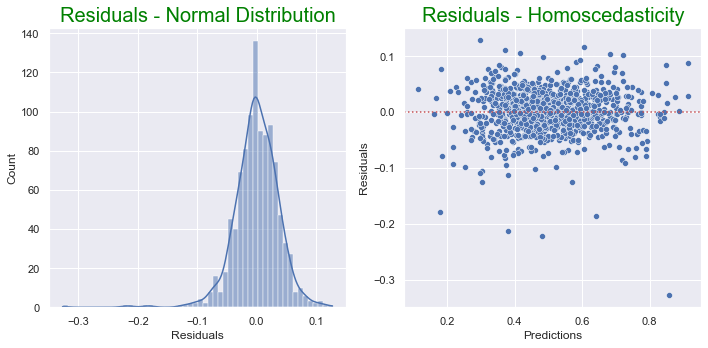

In [91]:
# Plots to show that the error distribution is nirmal and homoscedast.
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.histplot(errors, kde=True)
plt.title("Residuals - Normal Distribution", fontdict = {'fontsize' : 20, 'color':'green'})
plt.xlabel("Residuals")
plt.subplot(1,2,2)
sns.scatterplot(x=y_train_pred, y=errors)
plt.axhline(y=0, color='r', linestyle=':')
plt.title("Residuals - Homoscedasticity", fontdict = {'fontsize' : 20, 'color':'green'})
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.tight_layout()

Text(0, 0.5, 'Predictions')

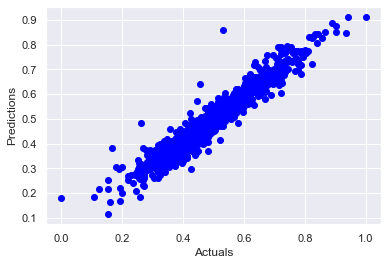

In [92]:
# Plot for Predicted salesPrice vs Actual salesPrice
plt.scatter( x=y_train , y=y_train_pred , color = 'blue')
plt.xlabel("Actuals")
plt.ylabel("Predictions")

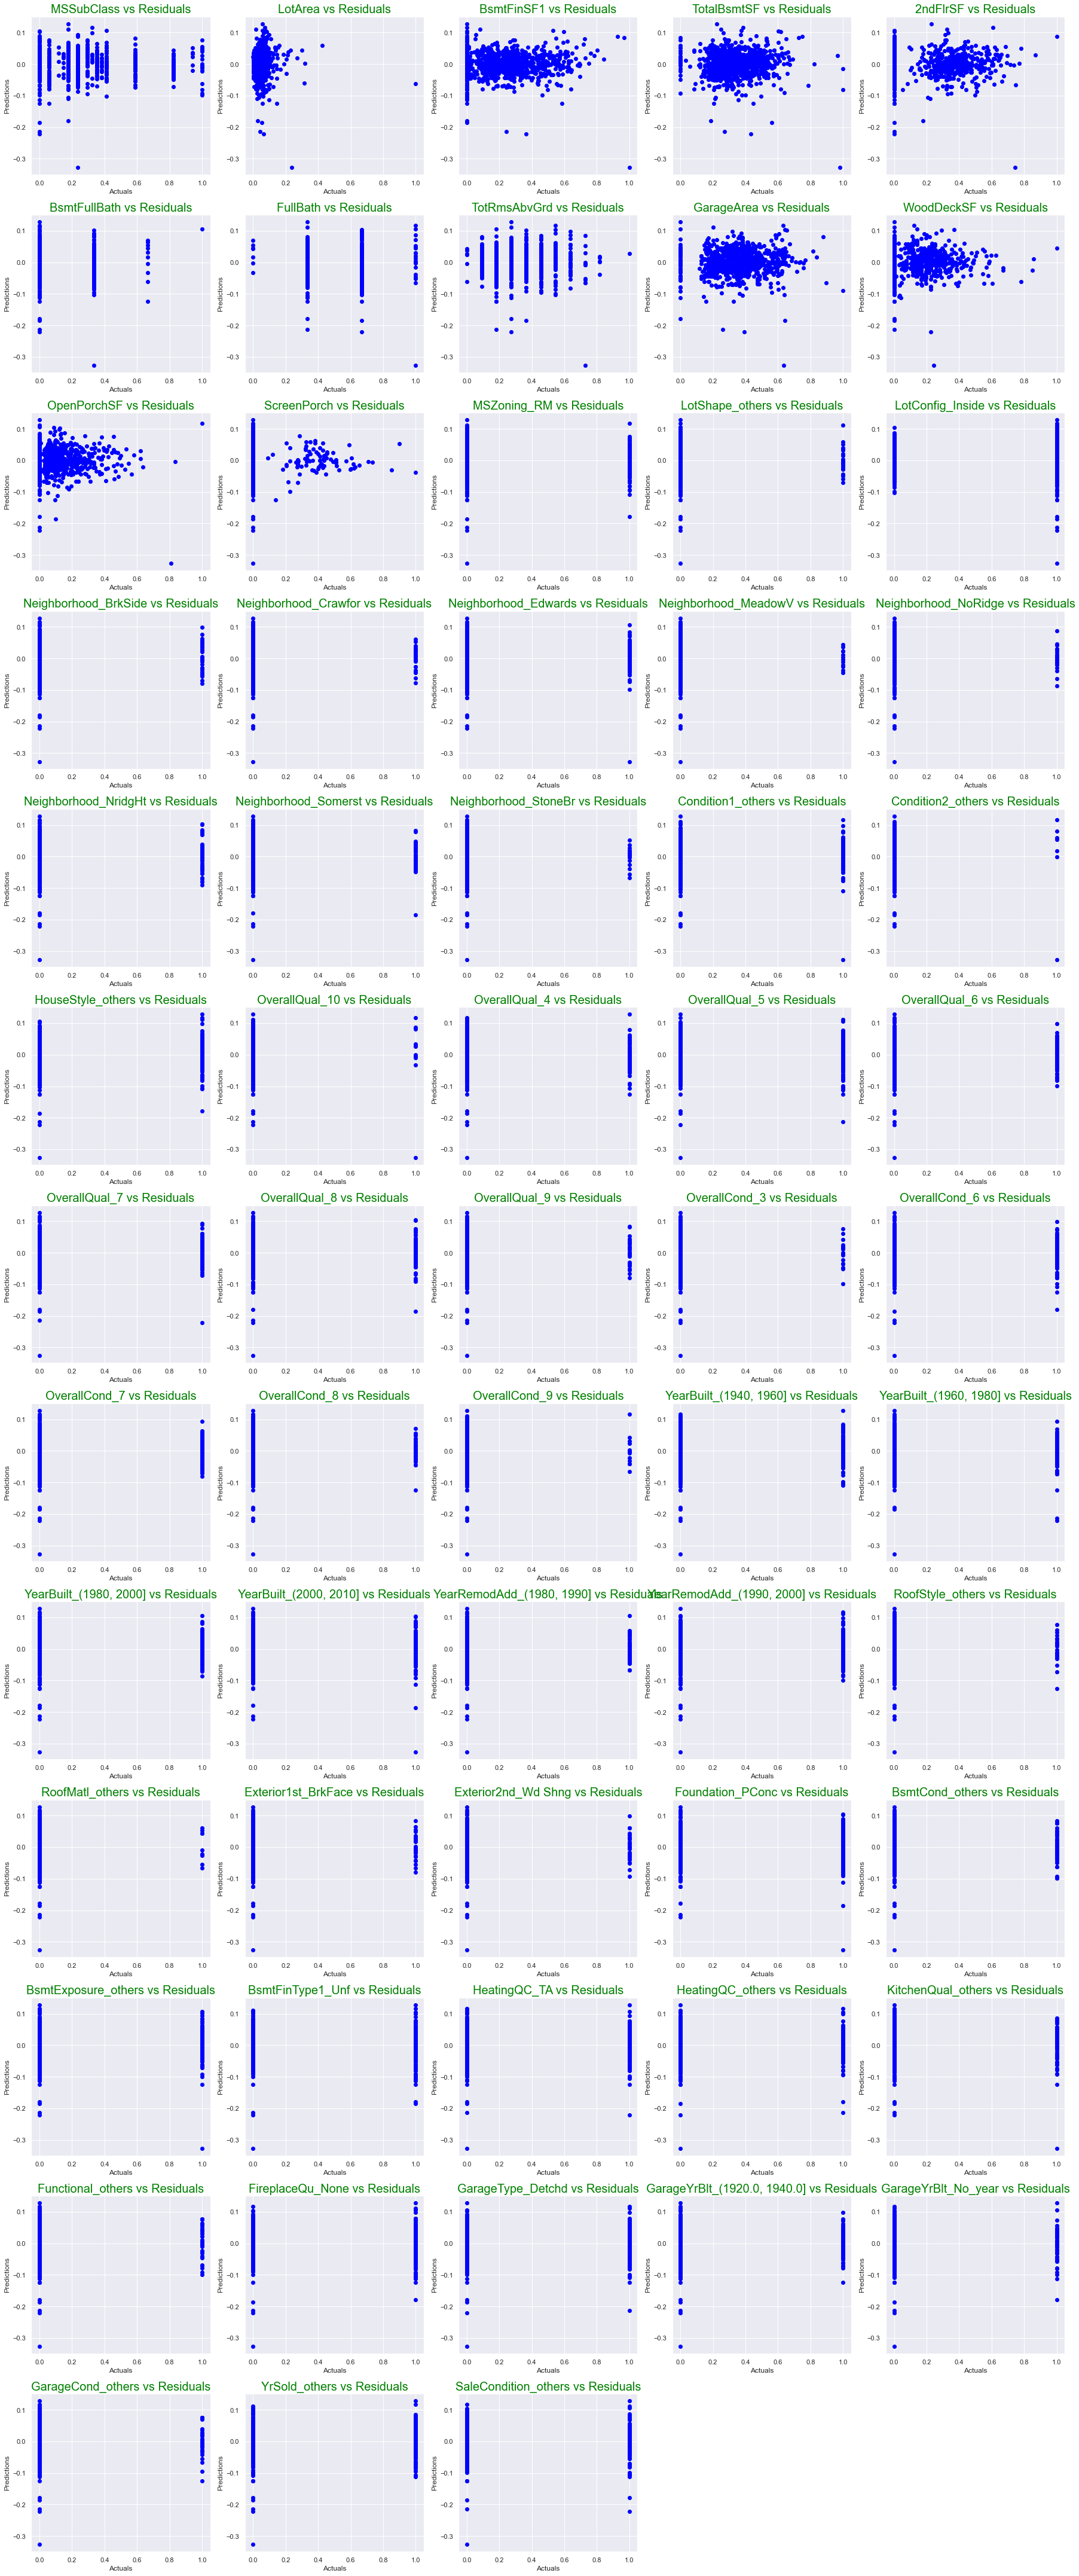

In [93]:
fig = plt.figure(figsize=(25, 60))
for i, col in enumerate(X_train.columns, 1):
    plt.subplot(13,5,i)
    plt.scatter( x=X_train[col] , y=errors , color = 'blue')
    plt.title(col+" vs Residuals", fontdict = {'fontsize' : 20, 'color':'green'})
    plt.xlabel("Actuals")
    plt.ylabel("Predictions")
    plt.tight_layout()

# 8. Predict the Test Data

In [94]:
df_test.describe()

MSSubClass  LotFrontage        LotArea   MasVnrArea   BsmtFinSF1  \
count  438.000000   438.000000     438.000000   438.000000   438.000000   
mean    59.554795    69.198630   10989.385845    97.591324   430.522831   
std     43.242126    22.476518   14358.240828   172.394470   489.016337   
min     20.000000    21.000000    1300.000000     0.000000     0.000000   
25%     20.000000    60.000000    7479.000000     0.000000     0.000000   
50%     60.000000    69.000000    9237.500000     0.000000   384.000000   
75%     70.000000    78.750000   11422.250000   162.750000   699.250000   
max    190.000000   313.000000  215245.000000  1170.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count   438.000000   438.000000   438.000000   438.000000   438.000000   
mean     35.906393   563.748858  1030.178082  1155.835616   365.671233   
std     138.940179   437.267190   477.414341   411.112957   438.024363   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   204.750000   768.000000   864.000000     0.000000   
50%       0.000000   485.000000   970.000000  1061.500000     0.000000   
75%       0.000000   797.500000  1239.250000  1417.750000   754.000000   
max    1061.000000  2336.000000  6110.000000  4692.000000  1872.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count    438.000000   438.000000    438.000000    438.000000  438.000000   
mean       6.374429  1527.881279      0.420091      0.045662    1.554795   
std       49.698878   548.849960      0.516774      0.219667    0.541599   
min        0.000000   334.000000      0.000000      0.000000    0.000000   
25%        0.000000  1144.500000      0.000000      0.000000    1.000000   
50%        0.000000  1481.500000      0.000000      0.000000    2.000000   
75%        0.000000  1770.250000      1.000000      0.000000    2.000000   
max      572.000000  5642.000000      2.000000      2.000000    3.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  438.000000    438.000000    438.000000    438.000000  438.000000   
mean     0.388128      2.869863      1.059361      6.552511    0.589041   
std      0.506295      0.814039      0.246052      1.649001    0.648934   
min      0.000000      0.000000      1.000000      2.000000    0.000000   
25%      0.000000      2.000000      1.000000      5.000000    0.000000   
50%      0.000000      3.000000      1.000000      6.500000    1.000000   
75%      1.000000      3.000000      1.000000      7.000000    1.000000   
max      2.000000      6.000000      3.000000     12.000000    3.000000   

       GarageCars   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  438.000000   438.000000  438.000000   438.000000      438.00000   
mean     1.771689   473.515982   89.888128    51.356164       21.06621   
std      0.749018   216.607848  127.725459    75.468369       56.93537   
min      0.000000     0.000000    0.000000     0.000000        0.00000   
25%      1.000000   337.750000    0.000000     0.000000        0.00000   
50%      2.000000   477.000000    0.000000    25.500000        0.00000   
75%      2.000000   576.000000  159.000000    72.000000        0.00000   
max      4.000000  1418.000000  668.000000   547.000000      386.00000   

        3SsnPorch  ScreenPorch    PoolArea      MiscVal   SalePrice  \
count  438.000000   438.000000  438.000000   438.000000  438.000000   
mean     3.739726    14.952055    2.780822    20.328767   12.012598   
std     28.480044    59.656185   42.021487   143.305283    0.410467   
min      0.000000     0.000000    0.000000     0.000000   10.460242   
25%      0.000000     0.000000    0.000000     0.000000   11.783905   
50%      0.000000     0.000000    0.000000     0.000000   11.978229   
75%      0.000000     0.000000    0.000000     0.000000   12.269047   
max    407.000000   480.000000  738.000000  2000.000000   13.534473 

In [95]:
# Apply scaler() to all the columns except 'dummy' variables in Test data
df_test[nonobj_columns] = scaler.transform(df_test[nonobj_columns])
df_test.describe()

MSSubClass  LotFrontage     LotArea  MasVnrArea  BsmtFinSF1  \
count  438.000000   438.000000  438.000000  438.000000  438.000000   
mean     0.232675     0.165064    0.057969    0.060995    0.190497   
std      0.254365     0.076974    0.088019    0.107747    0.216379   
min      0.000000     0.000000   -0.001428    0.000000    0.000000   
25%      0.000000     0.133562    0.036450    0.000000    0.000000   
50%      0.235294     0.164384    0.047230    0.000000    0.169912   
75%      0.294118     0.197774    0.060623    0.101719    0.309403   
max      1.000000     1.000000    1.310096    0.731250    2.497345   

       BsmtFinSF2   BsmtUnfSF  TotalBsmtSF    1stFlrSF    2ndFlrSF  \
count  438.000000  438.000000   438.000000  438.000000  438.000000   
mean     0.024360    0.261843     0.321328    0.274452    0.177081   
std      0.094261    0.203097     0.148913    0.143947    0.212118   
min      0.000000    0.000000     0.000000   -0.013305    0.000000   
25%      0.000000    0.095100     0.239551    0.172269    0.000000   
50%      0.000000    0.225267     0.302558    0.241422    0.000000   
75%      0.000000    0.370413     0.386541    0.366159    0.365133   
max      0.719810    1.084998     1.905802    1.512605    0.906538   

       LowQualFinSF   GrLivArea  BsmtFullBath  BsmtHalfBath    FullBath  \
count    438.000000  438.000000    438.000000    438.000000  438.000000   
mean       0.012073    0.257169      0.140030      0.022831    0.518265   
std        0.094127    0.129507      0.172258      0.109833    0.180533   
min        0.000000   -0.024540      0.000000      0.000000    0.000000   
25%        0.000000    0.166706      0.000000      0.000000    0.333333   
50%        0.000000    0.246225      0.000000      0.000000    0.666667   
75%        0.000000    0.314358      0.333333      0.000000    0.666667   
max        1.083333    1.227938      0.666667      1.000000    1.000000   

         HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  438.000000    438.000000    438.000000    438.000000  438.000000   
mean     0.194064      0.358733      0.353120      0.322956    0.196347   
std      0.253148      0.101755      0.082017      0.149909    0.216311   
min      0.000000      0.000000      0.333333     -0.090909    0.000000   
25%      0.000000      0.250000      0.333333      0.181818    0.000000   
50%      0.000000      0.375000      0.333333      0.318182    0.333333   
75%      0.500000      0.375000      0.333333      0.363636    0.333333   
max      1.000000      0.750000      1.000000      0.818182    1.000000   

       GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  438.000000  438.000000  438.000000   438.000000     438.000000   
mean     0.442922    0.340659    0.104887     0.102303       0.038163   
std      0.187254    0.155833    0.149038     0.150335       0.103144   
min      0.000000    0.000000    0.000000     0.000000       0.000000   
25%      0.250000    0.242986    0.000000     0.000000       0.000000   
50%      0.500000    0.343165    0.000000     0.050797       0.000000   
75%      0.500000    0.414388    0.185531     0.143426       0.000000   
max      1.000000    1.020144    0.779463     1.089641       0.699275   

        3SsnPorch  ScreenPorch    PoolArea     MiscVal   SalePrice  \
count  438.000000   438.000000  438.000000  438.000000  438.000000   
mean     0.007362     0.033982    0.004291    0.001312    0.493512   
std      0.056063     0.135582    0.064848    0.009246    0.137813   
min      0.000000     0.000000    0.000000    0.000000   -0.027687   
25%      0.000000     0.000000    0.000000    0.000000    0.416729   
50%      0.000000     0.000000    0.000000    0.000000    0.481973   
75%      0.000000     0.000000    0.000000    0.000000    0.579614   
max      0.801181     1.090909    1.138889    0.129032    1.004477   

       MSZoning_RM  MSZoning_others  Street_Pave  Alley_None  Alley_others  \
count   438.000000       4

In [96]:
# Create y_test and X_test
y_test = df_test.pop("SalePrice")
X_test = df_test

In [97]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

X_test_lm = sm.add_constant(X_test_new)      # add constant
y_test_pred = lin_model.predict(X_test_lm)   # predict the data y_test_pred on X-test_lm

In [98]:
# Get r-square and adjusted r-square for test data
print("R-squared from sklearn", r2_score(y_test, y_test_pred), sep = " : ")

R-squared from sklearn : 0.8036923894806243


In [99]:
metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
r2_test_lr = r2_score(y_test, y_test_pred)

rss_train_lr = np.sum(np.square(y_train - y_train_pred))
rss_test_lr = np.sum(np.square(y_test - y_test_pred))
                     
mse_train_lr = mean_squared_error(y_train, y_train_pred)
mse_test_lr = mean_squared_error(y_test, y_test_pred)
                     
rmse_train_lr = mse_train_lr ** 0.5
rmse_test_lr = mse_test_lr ** 0.5

metric.append(r2_train_lr)
metric.append(r2_test_lr)
metric.append(rss_train_lr)
metric.append(rss_test_lr)
metric.append(mse_train_lr)
metric.append(mse_test_lr)
metric.append(rmse_train_lr)
metric.append(rmse_test_lr)

print("Linear regression : ")
print("r2 score for training data  : ", r2_train_lr)
print("r2 score for test data  : ", r2_test_lr)

Linear regression : 
r2 score for training data  :  0.9188276193977183
r2 score for test data  :  0.8036923894806243


# 9. Ridge Regression

#### 9.1. Plot graphs for different lambda values

r2 score using 0.0001 = 0.918827619355425
r2 score using 0.0003 = 0.9188276190171767
r2 score using 0.0005 = 0.9188276183409322
r2 score using 0.001 = 0.9188276151733117
r2 score using 0.01 = 0.9188272018344736
r2 score using 0.05 = 0.9188176945463047
r2 score using 0.1 = 0.9187902598525275
r2 score using 0.2 = 0.9186943135350596
r2 score using 0.3 = 0.9185577538556979
r2 score using 0.4 = 0.9183927189262784
r2 score using 0.5 = 0.918207566388149
r2 score using 0.6 = 0.9180081473941749
r2 score using 0.7 = 0.9177986173249999
r2 score using 0.8 = 0.9175819636701067
r2 score using 0.9 = 0.9173603568075359
r2 score using 1.0 = 0.9171353873654288
r2 score using 2.0 = 0.9148564944920665
r2 score using 3.0 = 0.9126625367493637
r2 score using 5.0 = 0.9085625774506738
r2 score using 8.0 = 0.9029040127552344
r2 score using 9.0 = 0.9011110238300796
r2 score using 10 = 0.8993555269361944
r2 score using 20 = 0.8833269138456377
r2 score using 50 = 0.845366851486654
r2 score using 100 = 0.7996678565

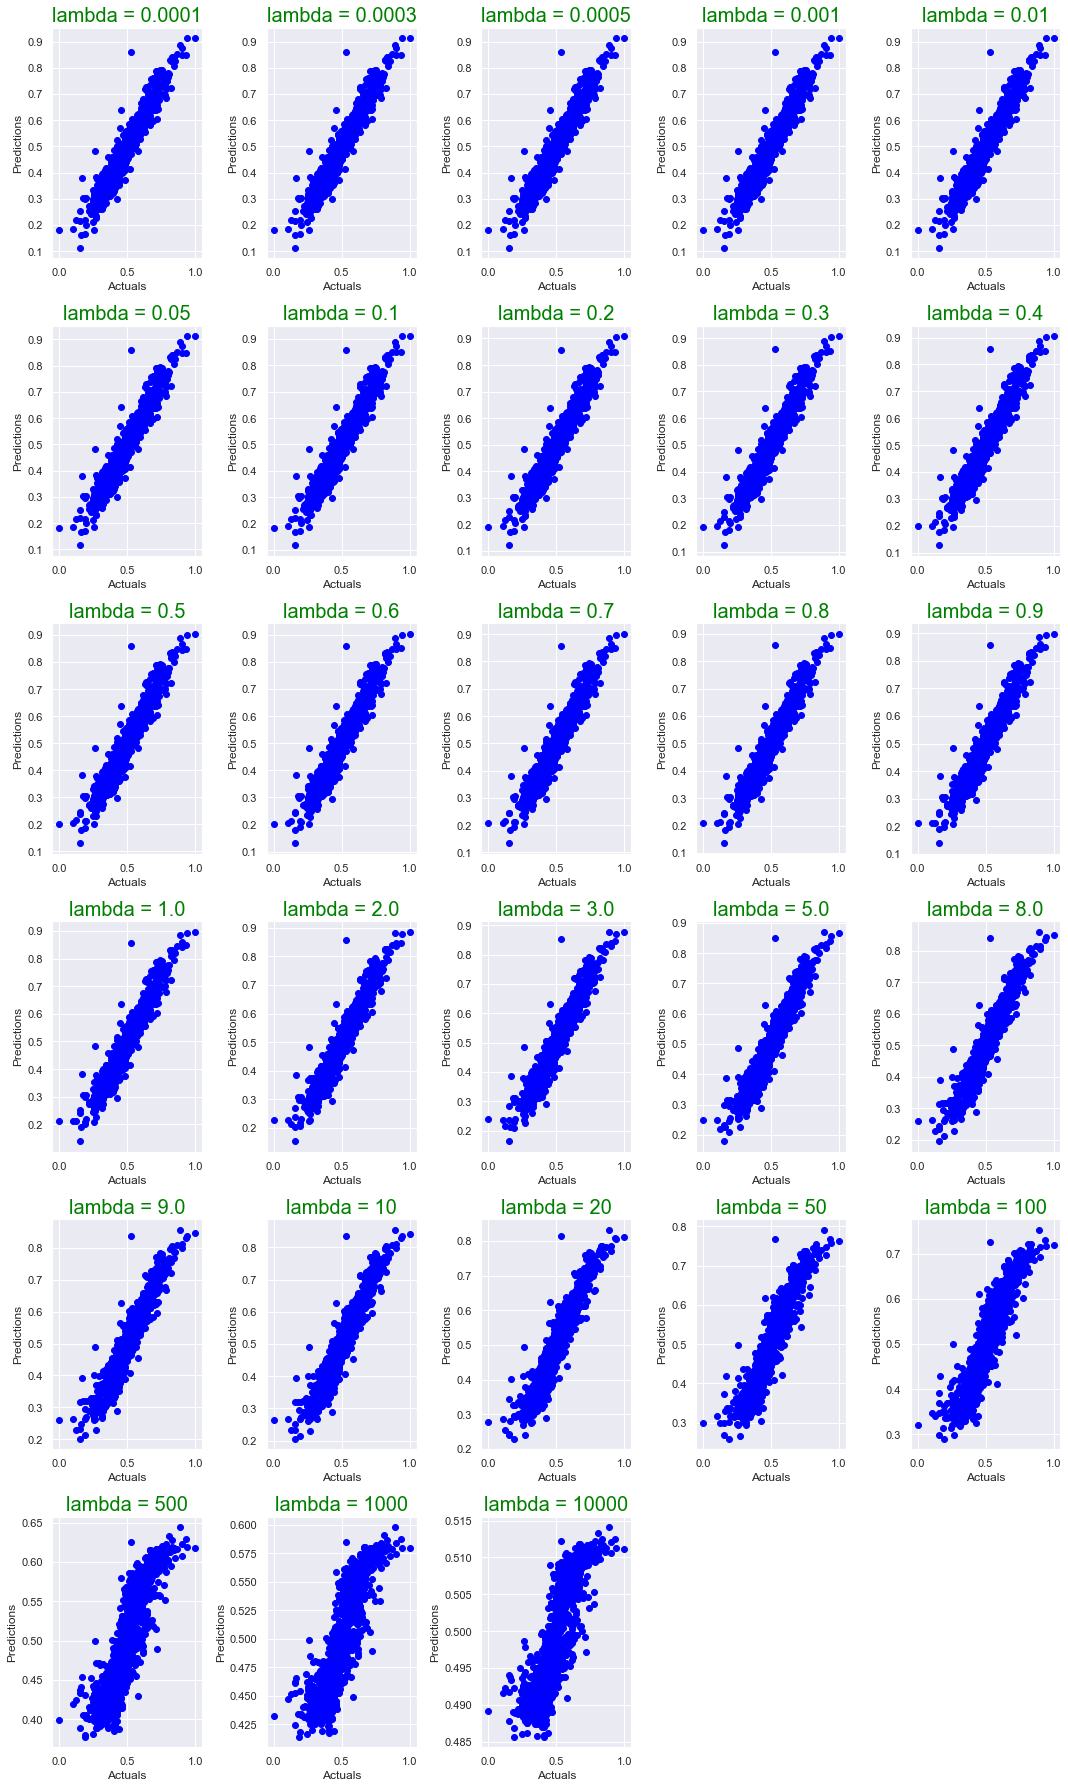

In [100]:
# Applying Ridge Regression with varying the hyperparameter 'lambda'

lambdas = [0.0001, 0.0003, 0.0005, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,0.9,
                     1.0, 2.0, 3.0,5.0,8.0,9.0,10, 20,50,100, 500, 1000, 10000]
fig = plt.figure(figsize=(15, 25))
for counter, i in enumerate(lambdas, 1):
    ridgereg = Ridge(alpha = i)
    ridgereg.fit(X_train, y_train)

    #Computing the r2 score
    y_train_pred = ridgereg.predict(X_train)
    y_test_pred = ridgereg.predict(X_test_new) 
    print("r2 score using "+ str(i) +" = " + str(r2_score(y_train, y_train_pred)))  
    plt.subplot(6,5,counter)
    plt.scatter( x=y_train , y=y_train_pred , color = 'blue') 
    plt.title("lambda = " + str(i), fontdict = {'fontsize' : 20, 'color':'green'})
    plt.xlabel("Actuals")
    plt.ylabel("Predictions")
    plt.tight_layout()

#### 9.2. Get the best lambda value for Ridge Regression

In [101]:
# Applying Ridge Regression with varying the hyperparameter 'lambda'
params = {'alpha' : lambdas }
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge, param_grid = params, scoring='neg_mean_absolute_error',
                        cv=folds, return_train_score=True, verbose=1)
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.0003, 0.0005, 0.001, 0.01, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 5.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000, 10000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [102]:
# Get the best hyper parameter alpha
model_cv.best_params_['alpha']

0.3

In [103]:
# List the top coefficients using Ridge regression

ridgereg = Ridge(alpha = model_cv.best_params_['alpha'])
ridgereg.fit(X_train, y_train)

y_train_pred = ridgereg.predict(X_train) 
y_test_pred = ridgereg.predict(X_test_new) 
print("intercept : " , ridgereg.intercept_)
print("coefficients : ", ridgereg.coef_)
s = pd.Series(ridgereg.coef_, X_train.columns)
s.sort_values(ascending=False)

intercept :  0.18825486334370817
coefficients :  [-0.02158535  0.08178065  0.0316455   0.17735689  0.08951069  0.03053574
  0.05456455  0.10176066  0.10306363  0.02601459  0.03399587  0.03424569
 -0.02278588  0.01606615 -0.00790765  0.02724192  0.04930308 -0.01705562
 -0.03269056  0.03817506  0.02773782  0.02144701  0.04191082 -0.02204933
 -0.08545217  0.01139096  0.15786598  0.03953986  0.05639094  0.07478938
  0.09362049  0.1137342   0.16349772 -0.03952728  0.01298695  0.02643396
  0.03189952  0.0543329   0.03722153  0.042372    0.04650895  0.07838068
  0.02192672  0.02133817  0.0179033   0.03621922  0.03888131 -0.01859189
  0.0097951  -0.01605156  0.01442064 -0.01089676 -0.01178685 -0.00908028
  0.01792048 -0.02601073 -0.01534423 -0.01144389  0.0285502  -0.02080829
 -0.0189641   0.00639699 -0.02600688]


TotalBsmtSF                     0.177357
OverallQual_9                   0.163498
OverallQual_10                  0.157866
OverallQual_8                   0.113734
GarageArea                      0.103064
TotRmsAbvGrd                    0.101761
OverallQual_7                   0.093620
2ndFlrSF                        0.089511
LotArea                         0.081781
YearBuilt_(2000, 2010]          0.078381
OverallQual_6                   0.074789
OverallQual_5                   0.056391
FullBath                        0.054565
OverallCond_9                   0.054333
Neighborhood_Crawfor            0.049303
YearBuilt_(1980, 2000]          0.046509
YearBuilt_(1960, 1980]          0.042372
Neighborhood_StoneBr            0.041911
OverallQual_4                   0.039540
Exterior1st_BrkFace             0.038881
Neighborhood_NoRidge            0.038175
YearBuilt_(1940, 1960]          0.037222
RoofMatl_others                 0.036219
ScreenPorch                     0.034246
OpenPorchSF     

In [104]:
metric2 = []
r2_train_lr = r2_score(y_train, y_train_pred)
r2_test_lr = r2_score(y_test, y_test_pred)

rss_train_lr = np.sum(np.square(y_train - y_train_pred))
rss_test_lr = np.sum(np.square(y_test - y_test_pred))
                     
mse_train_lr = mean_squared_error(y_train, y_train_pred)
mse_test_lr = mean_squared_error(y_test, y_test_pred)
                     
rmse_train_lr = mse_train_lr ** 0.5
rmse_test_lr = mse_test_lr ** 0.5

metric2.append(r2_train_lr)
metric2.append(r2_test_lr)
metric2.append(rss_train_lr)
metric2.append(rss_test_lr)
metric2.append(mse_train_lr)
metric2.append(mse_test_lr)
metric2.append(rmse_train_lr)
metric2.append(rmse_test_lr)

print("Ridge regression : ")
print("r2 score for training data  : ", r2_train_lr)
print("r2 score for test data  : ", r2_test_lr)

Ridge regression : 
r2 score for training data  :  0.9185577538556979
r2 score for test data  :  0.8046153850645228


# 10. Lasso Regression

#### 10.1. Plot graphs for different lambda values

r2 score using 0.0001 = 0.9155991174799621
r2 score using 0.0003 = 0.9048674503412857
r2 score using 0.0005 = 0.889150063993731
r2 score using 0.001 = 0.8663716970189337
r2 score using 0.01 = 0.4841511941275366
r2 score using 0.05 = 0.0
r2 score using 0.1 = 0.0
r2 score using 0.2 = 0.0
r2 score using 0.3 = 0.0
r2 score using 0.4 = 0.0
r2 score using 0.5 = 0.0
r2 score using 0.6 = 0.0
r2 score using 0.7 = 0.0
r2 score using 0.8 = 0.0
r2 score using 0.9 = 0.0
r2 score using 1.0 = 0.0
r2 score using 2.0 = 0.0
r2 score using 3.0 = 0.0
r2 score using 5.0 = 0.0
r2 score using 8.0 = 0.0
r2 score using 9.0 = 0.0
r2 score using 10 = 0.0
r2 score using 20 = 0.0
r2 score using 50 = 0.0
r2 score using 100 = 0.0
r2 score using 500 = 0.0
r2 score using 1000 = 0.0
r2 score using 10000 = 0.0


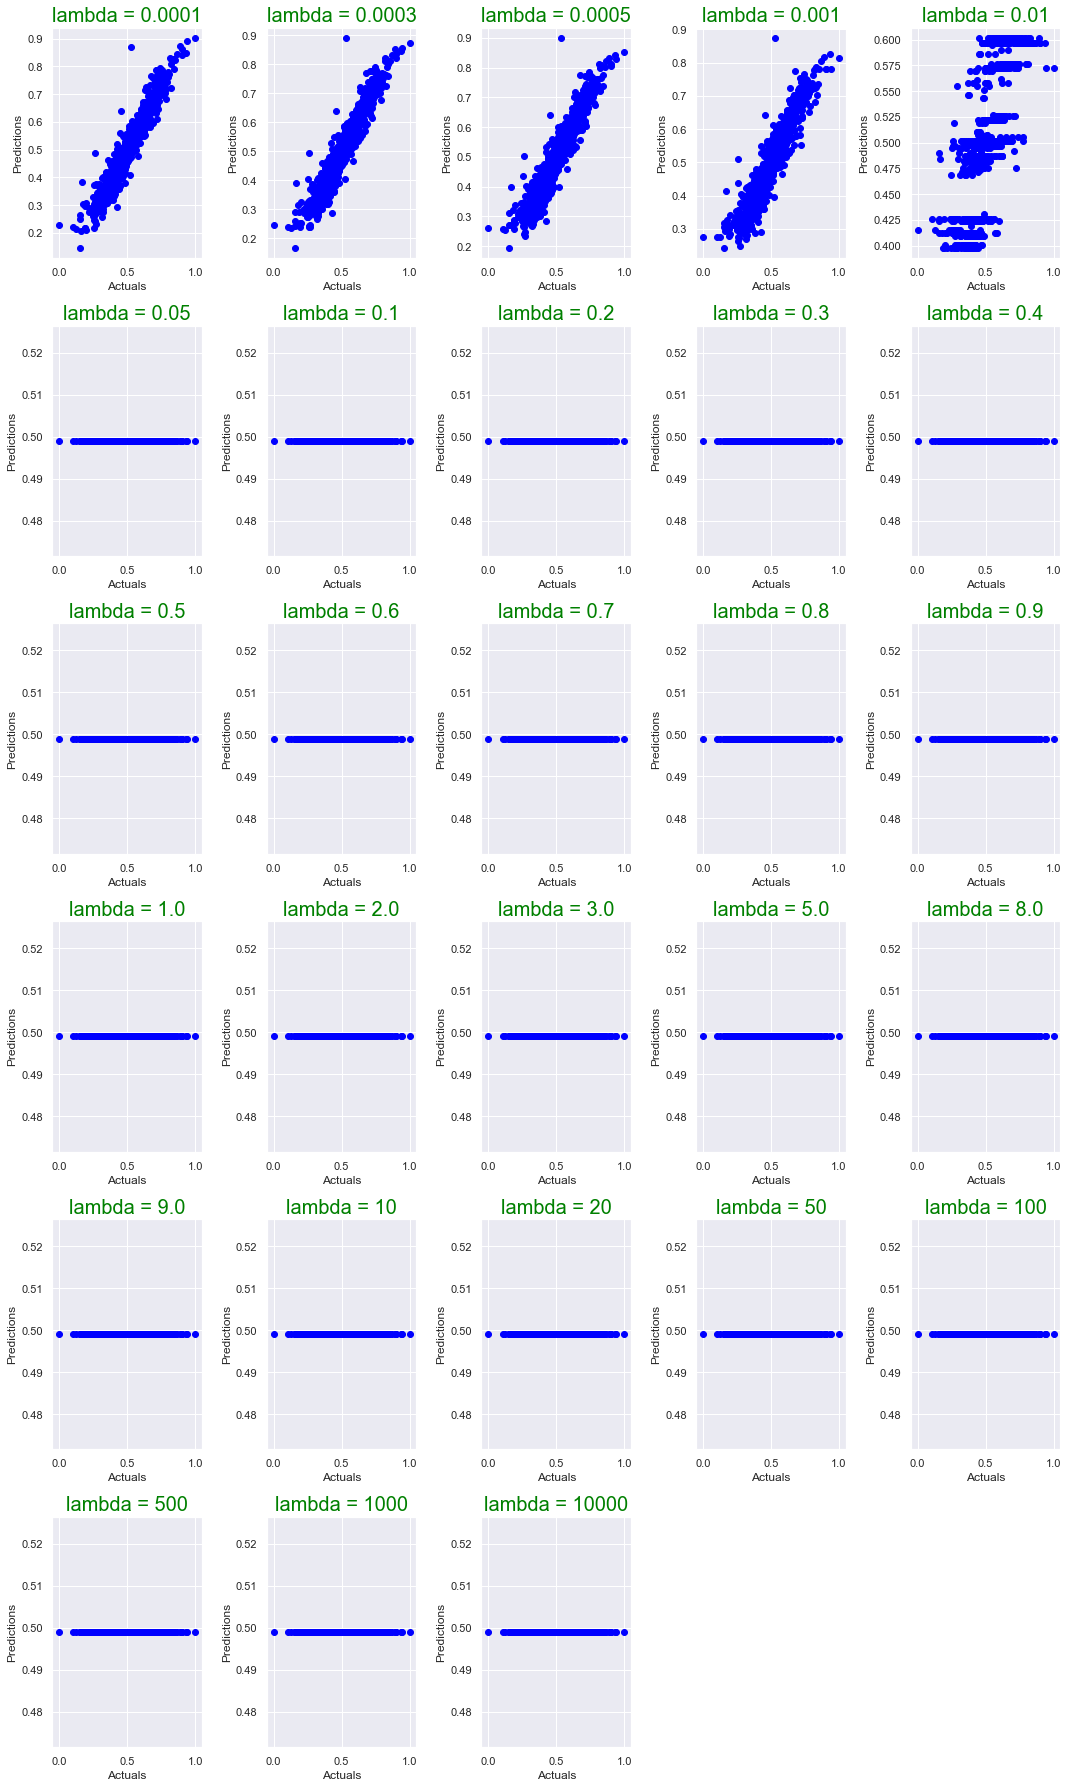

In [105]:
fig = plt.figure(figsize=(15, 25))
for counter, i in enumerate(lambdas, 1):
    lassoreg = Lasso(alpha = i)
    lassoreg.fit(X_train, y_train)

    #Computing the r2 score
    y_train_pred = lassoreg.predict(X_train)
    y_test_pred = lassoreg.predict(X_test_new) 
    print("r2 score using "+ str(i) +" = " + str(r2_score(y_train, y_train_pred)))  
    plt.subplot(6,5,counter)
    plt.scatter( x=y_train , y=y_train_pred , color = 'blue') 
    plt.title("lambda = " + str(i), fontdict = {'fontsize' : 20, 'color':'green'})
    plt.xlabel("Actuals")
    plt.ylabel("Predictions")
    plt.tight_layout()

#### 10.2. Get the best lambda value for Lasso Regression

In [106]:
# Applying Lasso Regression with varying the hyperparameter 'lambda'
params = {'alpha' : lambdas }
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso, param_grid = params, scoring='neg_mean_absolute_error',
                        cv=folds, return_train_score=True, verbose=1)
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0003, 0.0005, 0.001, 0.01, 0.05,
                                   0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0, 2.0, 3.0, 5.0, 8.0, 9.0, 10, 20, 50,
                                   100, 500, 1000, 10000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [107]:
# Get the best hyper parameter alpha
model_cv.best_params_['alpha']

0.0001

In [108]:
# List the top coefficients using Lasso regression
lassoreg = Lasso(alpha = model_cv.best_params_['alpha'])
lassoreg.fit(X_train, y_train)

y_train_pred = lassoreg.predict(X_train)
y_test_pred = lassoreg.predict(X_test_new) 
print("intercept : " , lassoreg.intercept_)
print("coefficients : ", lassoreg.coef_)
s = pd.Series(lassoreg.coef_, X_train.columns)
s.sort_values(ascending=False)

intercept :  0.23231901905512337
coefficients :  [-0.01882617  0.04418124  0.03321654  0.19502591  0.09386691  0.02772565
  0.0531798   0.09722588  0.10048946  0.02316234  0.02966091  0.03020879
 -0.02468571  0.01465042 -0.00795446  0.0195126   0.04473754 -0.01719493
 -0.02400935  0.0320681   0.02340886  0.01787797  0.03463946 -0.02032695
 -0.06846104  0.01037917  0.11288195  0.00133869  0.01913996  0.0369556
  0.05632646  0.07714544  0.12721827 -0.03992703  0.01086752  0.0266581
  0.03049075  0.04962471  0.03248439  0.03681222  0.04188044  0.07305387
  0.01834615  0.02102403  0.01180556  0.03153267  0.03397617 -0.0131733
  0.00967433 -0.0180631   0.01524762 -0.01148817 -0.01100343 -0.00897456
  0.01518898 -0.02617039 -0.01708878 -0.01201768  0.02496114 -0.02561326
 -0.01637128  0.00593516 -0.02566463]


TotalBsmtSF                     0.195026
OverallQual_9                   0.127218
OverallQual_10                  0.112882
GarageArea                      0.100489
TotRmsAbvGrd                    0.097226
2ndFlrSF                        0.093867
OverallQual_8                   0.077145
YearBuilt_(2000, 2010]          0.073054
OverallQual_7                   0.056326
FullBath                        0.053180
OverallCond_9                   0.049625
Neighborhood_Crawfor            0.044738
LotArea                         0.044181
YearBuilt_(1980, 2000]          0.041880
OverallQual_6                   0.036956
YearBuilt_(1960, 1980]          0.036812
Neighborhood_StoneBr            0.034639
Exterior1st_BrkFace             0.033976
BsmtFinSF1                      0.033217
YearBuilt_(1940, 1960]          0.032484
Neighborhood_NoRidge            0.032068
RoofMatl_others                 0.031533
OverallCond_8                   0.030491
ScreenPorch                     0.030209
OpenPorchSF     

In [109]:
metric3 = []
r2_train_lr = r2_score(y_train, y_train_pred)
r2_test_lr = r2_score(y_test, y_test_pred)

rss_train_lr = np.sum(np.square(y_train - y_train_pred))
rss_test_lr = np.sum(np.square(y_test - y_test_pred))
                     
mse_train_lr = mean_squared_error(y_train, y_train_pred)
mse_test_lr = mean_squared_error(y_test, y_test_pred)
                     
rmse_train_lr = mse_train_lr ** 0.5
rmse_test_lr = mse_test_lr ** 0.5

metric3.append(r2_train_lr)
metric3.append(r2_test_lr)
metric3.append(rss_train_lr)
metric3.append(rss_test_lr)
metric3.append(mse_train_lr)
metric3.append(mse_test_lr)
metric3.append(rmse_train_lr)
metric3.append(rmse_test_lr)

print("Lasso regression : ")
print("r2 score for training data  : ", r2_train_lr)
print("r2 score for test data  : ", r2_test_lr)

Lasso regression : 
r2 score for training data  :  0.9155991174799621
r2 score for test data  :  0.8024866539009619


In [110]:
# Metrics to give an overall sense of error in the model
print("Lasso regression : ")
print("rss for training data: ",np.sum(np.square(y_train - y_train_pred)))
print("rss for test data: ",np.sum(np.square(y_test - y_test_pred)), "\n")
mse = mean_squared_error(y_train, y_train_pred)
print("mse for training data : ", mse)
print("mse for test data : ", mean_squared_error(y_test, y_test_pred), "\n")
rmse = mse**0.5
print("rmse for training data : ", rmse)
print("rmse for test data : ", mean_squared_error(y_test, y_test_pred)**0.5)

Lasso regression : 
rss for training data:  1.5136234147335559
rss for test data:  1.6393030154668051 

mse for training data :  0.0014810405232226573
mse for test data :  0.0037427009485543495 

rmse for training data :  0.03848428930385304
rmse for test data :  0.06117761803596434


# 11. Comparison

In [111]:
# Construct a dataframe to show different metrics across different models
lr_table = {'Metric' : ['R2 Score (Train)',
                        'R2 Score (Test)', 
                        'RSS (Train)', 
                        'RSS (Test)', 
                        'MSE (Train)', 
                        'MSE (Test)',
                        'RMSE (Train)', 
                        'RMSE (Test)'], 
            'Linear Regression': metric}
lr_metric = pd.DataFrame(lr_table)
lr_metric = pd.DataFrame(lr_table, columns = ['Metric', 'Linear Regression'])
rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.918828          0.918558          0.915599
1   R2 Score (Test)           0.803692          0.804615          0.802487
2       RSS (Train)           1.455724          1.460564          1.513623
3        RSS (Test)           1.629296          1.621635          1.639303
4       MSE (Train)           0.001424          0.001429          0.001481
5        MSE (Test)           0.003720          0.003702          0.003743
6      RMSE (Train)           0.037741          0.037804          0.038484
7       RMSE (Test)           0.060991          0.060847          0.061178

In [112]:
betas = pd.DataFrame(index = X_train.columns)

In [113]:
betas.rows = X_train.columns

<ipython-input-113-817434e33085>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X_train.columns


In [114]:
# Construct a dataframe to show regression coefficients across different models
betas['Linear'] = lin_model.params
betas['Ridge'] = ridgereg.coef_
betas['Lasso'] = lassoreg.coef_
betas

Linear     Ridge     Lasso
MSSubClass                   -0.021267 -0.021585 -0.018826
LotArea                       0.097745  0.081781  0.044181
BsmtFinSF1                    0.028793  0.031645  0.033217
TotalBsmtSF                   0.178702  0.177357  0.195026
2ndFlrSF                      0.089825  0.089511  0.093867
BsmtFullBath                  0.030645  0.030536  0.027726
FullBath                      0.052841  0.054565  0.053180
TotRmsAbvGrd                  0.100523  0.101761  0.097226
GarageArea                    0.105512  0.103064  0.100489
WoodDeckSF                    0.025243  0.026015  0.023162
OpenPorchSF                   0.032729  0.033996  0.029661
ScreenPorch                   0.034169  0.034246  0.030209
MSZoning_RM                  -0.022775 -0.022786 -0.024686
LotShape_others               0.015383  0.016066  0.014650
LotConfig_Inside             -0.007793 -0.007908 -0.007954
Neighborhood_BrkSide          0.029432  0.027242  0.019513
Neighborhood_Crawfor          0.049532  0.049303  0.044738
Neighborhood_Edwards         -0.016628 -0.017056 -0.017195
Neighborhood_MeadowV         -0.032846 -0.032691 -0.024009
Neighborhood_NoRidge          0.037112  0.038175  0.032068
Neighborhood_NridgHt          0.026733  0.027738  0.023409
Neighborhood_Somerst          0.021127  0.021447  0.017878
Neighborhood_StoneBr          0.041253  0.041911  0.034639
Condition1_others            -0.022063 -0.022049 -0.020327
Condition2_others            -0.093084 -0.085452 -0.068461
HouseStyle_others             0.011041  0.011391  0.010379
OverallQual_10                0.184193  0.157866  0.112882
OverallQual_4                 0.055325  0.039540  0.001339
OverallQual_5                 0.072742  0.056391  0.019140
OverallQual_6                 0.091737  0.074789  0.036956
OverallQual_7                 0.111474  0.093620  0.056326
OverallQual_8                 0.132456  0.113734  0.077145
OverallQual_9                 0.184842  0.163498  0.127218
OverallCond_3                -0.039347 -0.039527 -0.039927
OverallCond_6                 0.013444  0.012987  0.010868
OverallCond_7                 0.026101  0.026434  0.026658
OverallCond_8                 0.032106  0.031900  0.030491
OverallCond_9                 0.054440  0.054333  0.049625
YearBuilt_(1940, 1960]        0.037382  0.037222  0.032484
YearBuilt_(1960, 1980]        0.042507  0.042372  0.036812
YearBuilt_(1980, 2000]        0.046874  0.046509  0.041880
YearBuilt_(2000, 2010]        0.077897  0.078381  0.073054
YearRemodAdd_(1980, 1990]     0.021849  0.021927  0.018346
YearRemodAdd_(1990, 2000]     0.020968  0.021338  0.021024
RoofStyle_others              0.019635  0.017903  0.011806
RoofMatl_others               0.034110  0.036219  0.031533
Exterior1st_BrkFace           0.039347  0.038881  0.033976
Exterior2nd_Wd Shng          -0.019320 -0.018592 -0.013173
Foundation_PConc              0.009603  0.009795  0.009674
BsmtCond_others              -0.013743 -0.016052 -0.018063
BsmtExposure_others           0.013811  0.014421  0.015248
BsmtFinType1_Unf             -0.011379 -0.010897 -0.011488
HeatingQC_TA                 -0.011750 -0.011787 -0.011003
HeatingQC_others             -0.008721 -0.009080 -0.008975
KitchenQual_others            0.017392  0.017920  0.015189
Functional_others            -0.025307 -0.026011 -0.026170
FireplaceQu_None             -0.014684 -0.015344 -0.017089
GarageType_Detchd            -0.011206 -0.011444 -0.012018
GarageYrBlt_(1920.0, 1940.0]  0.028553  0.028550  0.024961
GarageYrBlt_No_year          -0.018147 -0.020808 -0.025613
GarageCond_others            -0.018804 -0.018964 -0.016371
YrSold_others                 0.006368  0.006397  0.005935
SaleCondition_others         -0.026019 -0.026007 -0.025665

# Question -1

In [115]:
# Double the value of alpha for Ridge regression

ridgereg = Ridge(alpha = 0.6)
ridgereg.fit(X_train, y_train)

y_train_pred = ridgereg.predict(X_train) 
y_test_pred = ridgereg.predict(X_test_new)
print("Ridge regression : ")
print("r2 score for training data  : ", r2_score(y_train, y_train_pred))
print("r2 score for test data  : ", r2_score(y_test, y_test_pred))
print("intercept : " , ridgereg.intercept_)
print("coefficients : ", ridgereg.coef_)
s = pd.Series(ridgereg.coef_, X_train.columns)
s.sort_values(ascending=False)

Ridge regression : 
r2 score for training data  :  0.9180081473941749
r2 score for test data  :  0.8051781573689673
intercept :  0.20186988704133518
coefficients :  [-0.02187745  0.07122491  0.03399137  0.17439078  0.088602    0.03040388
  0.05596331  0.10262382  0.10097418  0.02654065  0.03485652  0.03423213
 -0.0229155   0.01644965 -0.00800294  0.02545153  0.048961   -0.01741275
 -0.0322451   0.03900763  0.02848063  0.02162504  0.04218646 -0.02199945
 -0.07910046  0.01155447  0.13939845  0.02832233  0.04484852  0.06291558
  0.08118237  0.10081274  0.14859593 -0.03950402  0.01253225  0.02653214
  0.03152854  0.05377707  0.03673548  0.04185309  0.04574303  0.07819877
  0.02200846  0.02162455  0.01664344  0.0373598   0.03848094 -0.01813593
  0.00998975 -0.01795916  0.01486326 -0.01053743 -0.01185288 -0.00941127
  0.01838086 -0.02644972 -0.01590252 -0.01166942  0.02830546 -0.02285323
 -0.01900693  0.00639552 -0.025984  ]


TotalBsmtSF                     0.174391
OverallQual_9                   0.148596
OverallQual_10                  0.139398
TotRmsAbvGrd                    0.102624
GarageArea                      0.100974
OverallQual_8                   0.100813
2ndFlrSF                        0.088602
OverallQual_7                   0.081182
YearBuilt_(2000, 2010]          0.078199
LotArea                         0.071225
OverallQual_6                   0.062916
FullBath                        0.055963
OverallCond_9                   0.053777
Neighborhood_Crawfor            0.048961
YearBuilt_(1980, 2000]          0.045743
OverallQual_5                   0.044849
Neighborhood_StoneBr            0.042186
YearBuilt_(1960, 1980]          0.041853
Neighborhood_NoRidge            0.039008
Exterior1st_BrkFace             0.038481
RoofMatl_others                 0.037360
YearBuilt_(1940, 1960]          0.036735
OpenPorchSF                     0.034857
ScreenPorch                     0.034232
BsmtFinSF1      

In [116]:
# Double the value of alpha for Lasso regression

lassoreg = Lasso(alpha = 0.0002)
lassoreg.fit(X_train, y_train)

y_train_pred = lassoreg.predict(X_train) 
y_test_pred = lassoreg.predict(X_test_new)
print("Lasso regression : ")
print("r2 score for training data  : ", r2_score(y_train, y_train_pred))
print("r2 score for test data  : ", r2_score(y_test, y_test_pred))
print("intercept : " , lassoreg.intercept_)
print("coefficients : ", lassoreg.coef_)
s = pd.Series(lassoreg.coef_, X_train.columns)
s.sort_values(ascending=False)

Lasso regression : 
r2 score for training data  :  0.9103462814277485
r2 score for test data  :  0.798233030655445
intercept :  0.263930879199371
coefficients :  [-0.01655116  0.          0.03733268  0.20327387  0.09523634  0.02432314
  0.05274666  0.09370178  0.09909707  0.02130741  0.02572181  0.02585825
 -0.02763015  0.01308192 -0.00840729  0.01159466  0.03982267 -0.01781925
 -0.01630029  0.02791252  0.02002244  0.01461979  0.02764134 -0.01823998
 -0.04535181  0.00869998  0.07792018 -0.01398844  0.          0.01697919
  0.03624843  0.05693291  0.10420219 -0.03820499  0.00835096  0.02592923
  0.02821915  0.04345815  0.02515934  0.02840415  0.03519678  0.06617978
  0.01494591  0.0206974   0.00666858  0.02706893  0.02975034 -0.00842631
  0.00934726 -0.02091409  0.01669019 -0.01176666 -0.01044119 -0.0090898
  0.01461422 -0.0250622  -0.01960389 -0.01322712  0.02021445 -0.02978408
 -0.01336275  0.00559066 -0.02517681]


TotalBsmtSF                     0.203274
OverallQual_9                   0.104202
GarageArea                      0.099097
2ndFlrSF                        0.095236
TotRmsAbvGrd                    0.093702
OverallQual_10                  0.077920
YearBuilt_(2000, 2010]          0.066180
OverallQual_8                   0.056933
FullBath                        0.052747
OverallCond_9                   0.043458
Neighborhood_Crawfor            0.039823
BsmtFinSF1                      0.037333
OverallQual_7                   0.036248
YearBuilt_(1980, 2000]          0.035197
Exterior1st_BrkFace             0.029750
YearBuilt_(1960, 1980]          0.028404
OverallCond_8                   0.028219
Neighborhood_NoRidge            0.027913
Neighborhood_StoneBr            0.027641
RoofMatl_others                 0.027069
OverallCond_7                   0.025929
ScreenPorch                     0.025858
OpenPorchSF                     0.025722
YearBuilt_(1940, 1960]          0.025159
BsmtFullBath    

# Question - 3

#### The top features for Lasso are 
TotalBsmtSF,            
OverallQual_9,                 
OverallQual_10,             
GarageArea, and               
TotRmsAbvGrd 

In [117]:
# Remove the top 5 predictors for Lasso regression
print(X_train.shape)
print(X_train.columns)
X_train = X_train.drop(["TotalBsmtSF"], axis = 1)
X_train = X_train.drop(["OverallQual_9"], axis = 1)
X_train = X_train.drop(["OverallQual_10"], axis = 1)
X_train = X_train.drop(["GarageArea"], axis = 1)
X_train = X_train.drop(["TotRmsAbvGrd"], axis = 1)

lassoreg = Lasso(alpha = 0.0001)
lassoreg.fit(X_train, y_train)

y_train_pred = lassoreg.predict(X_train) 
y_test_pred = lassoreg.predict(X_test[X_train.columns])
print("Lasso regression : ")
print("r2 score for training data  : ", r2_score(y_train, y_train_pred))
print("r2 score for test data  : ", r2_score(y_test, y_test_pred))
print("intercept : " , lassoreg.intercept_)
print("coefficients : ", lassoreg.coef_)
s = pd.Series(lassoreg.coef_, X_train.columns)
s.sort_values(ascending=False)

(1022, 63)
Index(['MSSubClass', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF',
       'BsmtFullBath', 'FullBath', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'ScreenPorch', 'MSZoning_RM', 'LotShape_others',
       'LotConfig_Inside', 'Neighborhood_BrkSide', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition1_others', 'Condition2_others', 'HouseStyle_others',
       'OverallQual_10', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallCond_3',
       'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'YearBuilt_(1940, 1960]', 'YearBuilt_(1960, 1980]',
       'YearBuilt_(1980, 2000]', 'YearBuilt_(2000, 2010]',
       'YearRemodAdd_(1980, 1990]', 'YearRemodAdd_(1990, 2000]',
       'RoofStyle_others', 'RoofMatl_others', 'Exterio

LotArea                         0.146406
FullBath                        0.125854
BsmtFinSF1                      0.102067
2ndFlrSF                        0.094559
YearBuilt_(2000, 2010]          0.087245
Neighborhood_NoRidge            0.069170
Neighborhood_StoneBr            0.065418
Neighborhood_NridgHt            0.061821
OpenPorchSF                     0.059846
RoofMatl_others                 0.056563
OverallCond_9                   0.053590
Neighborhood_Crawfor            0.050444
Exterior1st_BrkFace             0.046118
ScreenPorch                     0.042477
KitchenQual_others              0.042253
YearBuilt_(1960, 1980]          0.036203
WoodDeckSF                      0.035758
YearBuilt_(1980, 2000]          0.033580
BsmtFullBath                    0.030915
YearRemodAdd_(1990, 2000]       0.028163
YearBuilt_(1940, 1960]          0.026440
Neighborhood_Somerst            0.024017
YearRemodAdd_(1980, 1990]       0.023763
OverallCond_7                   0.023738
OverallCond_8   